##**Практическое задание «Операции морфологии при обработки изображений»**

Выполнил: Рупасов Кирилл, 402 группа.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
import matplotlib.image as mpimg #Чтобы вывести изображение
import numpy as np  #Для работы с числовыми массивами
import random
from PIL import Image, ImageDraw, ImageOps
import cv2

In [2]:
#Открываем изображения
try:
    img1 = cv2.imread("Blobs 2.jpg")
    img2 = cv2.imread("Blobs.jpg")
    img3 = cv2.imread("Bri.jpg")
    img4 = cv2.imread("Fingerprint.jpg")
    img5 = cv2.imread("morph2.bmp")
    img6 = cv2.imread("morph3.bmp")
    img7 = cv2.imread("Truck.jpg")
    img8 = cv2.imread("Morph.jpg")
except FileNotFoundError:
    print("Файл не найден")

In [3]:
all_img = [img1, img2, img3, img4, img5, img6, img7, img8]

In [4]:
def draw_image3(image, imageNew, n, i):
 plt.figure(figsize=(16,13), dpi=90)
 plt.subplot2grid((3,3), (0,0)) # 1 - исходное изображение
 plt.imshow(image) # Вывод
 plt.title('Исходное изображение')
 plt.subplot2grid((3,3), (0,1)) # 2 - преобразованное изображение
 plt.imshow(imageNew) # Вывод
 plt.title('Преобразованное изображение')
 #Гистограммы двух изображений
 plt.subplot2grid((3,3), (0,2))
 plt.hist(np.ravel(image), bins=256, label=['Оригинал'])
 plt.hist(np.ravel(imageNew), bins=256, label=['Результат'])
 plt.title('Гистограмма интенсивности цвета\n n=%d,i=%d'%(n,i))
 plt.legend()
 plt.show()



###**1. Откройте изображение Morph.jpg. Примените к нему базовые морфологические операции (дилатацию и эрозию) с структурными элементами крест, прямоугольник и эллипс (для каждого из них попробуйте размеры 3x3 и 5х5) и с 1, 3 , 5 итерациями. Сохраните результаты, дайте пояснения к ним.**

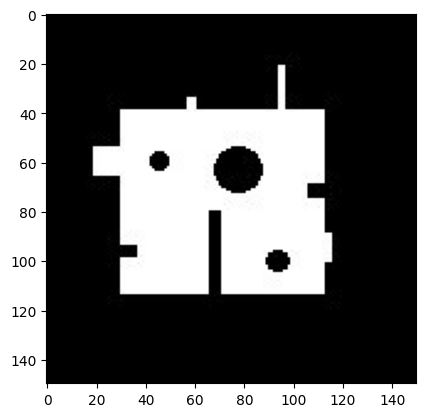

In [5]:
img8 = cv2.imread("Morph.jpg")
plt.imshow(img8)
plt.show()



Дилатация - немного расширяет изображение, Эррозия - "съедает" изображение

In [6]:
#Дилатация
#Используем структурные элементы: прямоугольник, крест, эллипс
def dilate1(n, i): # Прямоугольник
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (n, n)) #Используем структурный элемент - прямоугольник, его заполняют единички матрицой n на n
  transform_img = cv2.dilate(img8, kernel, iterations = i)
  draw_image3(img8, transform_img, n, i)

def dilate2(n, i): # Крест
  kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (n, n))
  transform_img = cv2.dilate(img8, kernel, iterations = i)
  draw_image3(img8, transform_img, n, i)

def dilate3(n, i): # Эллипс
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (n, n))
  transform_img = cv2.dilate(img8, kernel, iterations = i)
  draw_image3(img8, transform_img, n, i)

Произошло расширение, отверстия внутри фигуры практически (или совсем) исчезли.

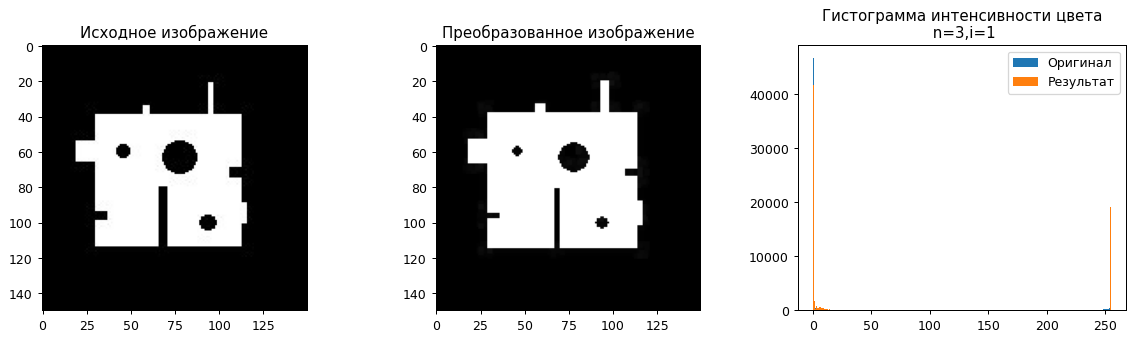

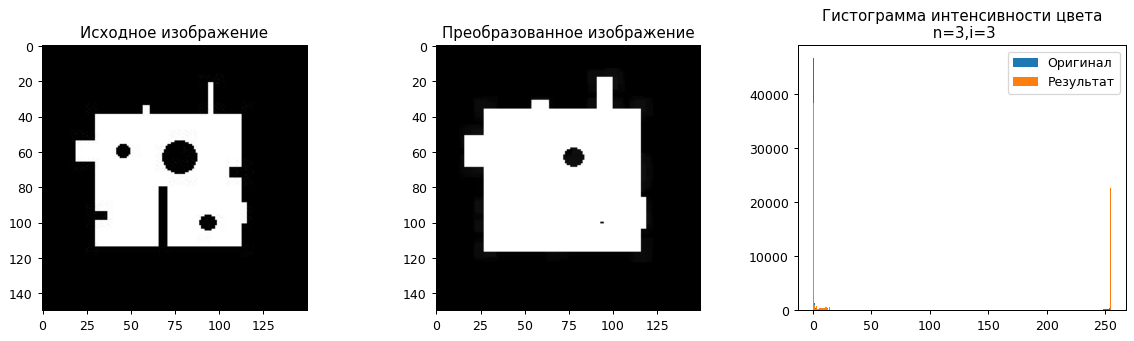

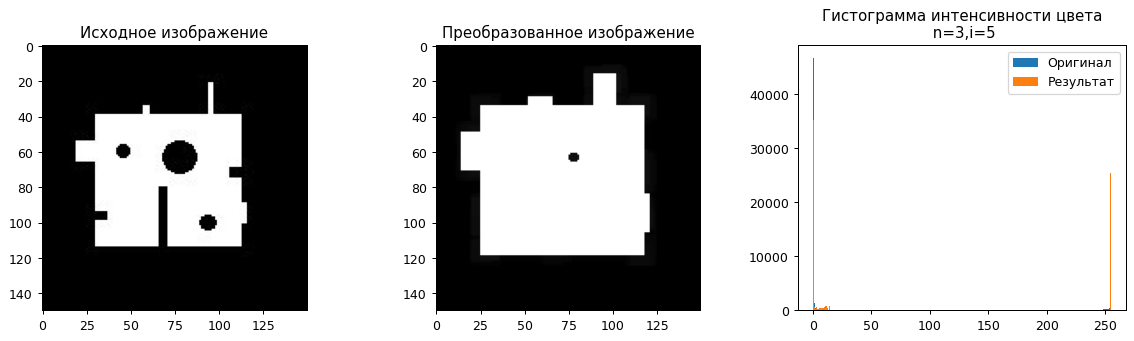

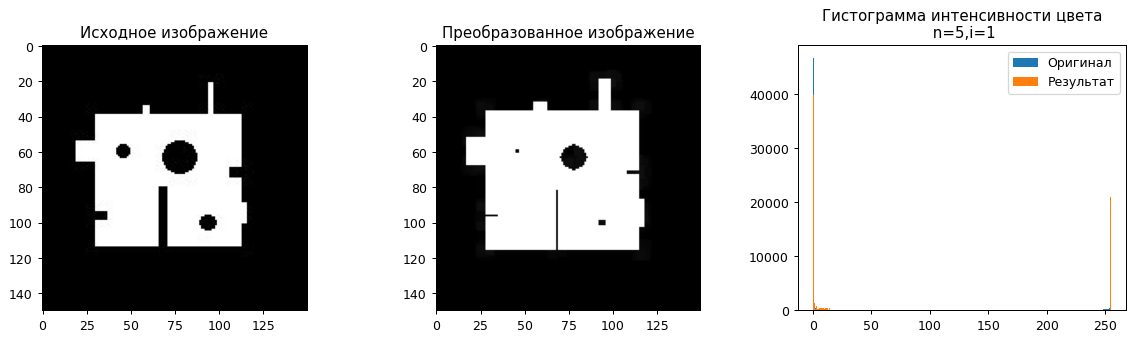

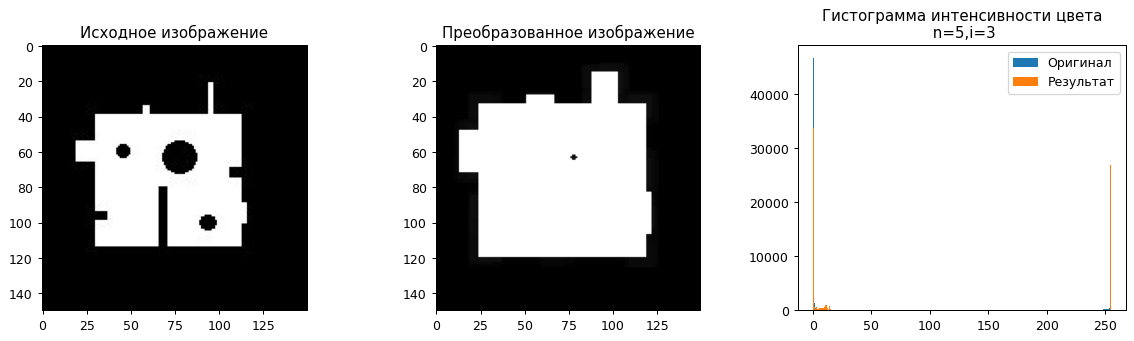

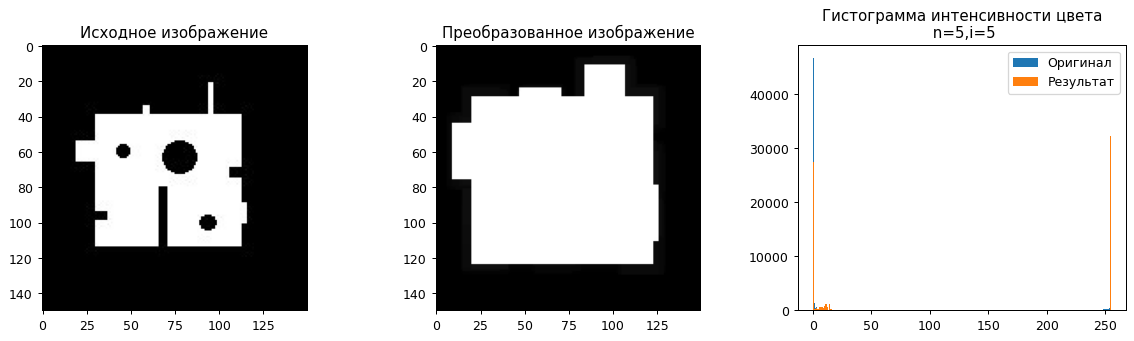

In [7]:
# Прямоугольник
for n in range(3, 6, 2):
  for i in range(1, 6, 2):
    dilate1(n, i)

Отверстия (дефекты) внутри объекта почти пропали

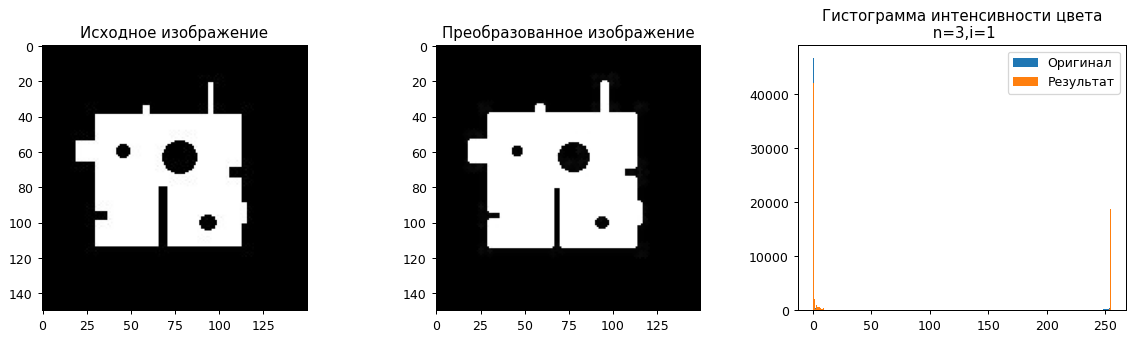

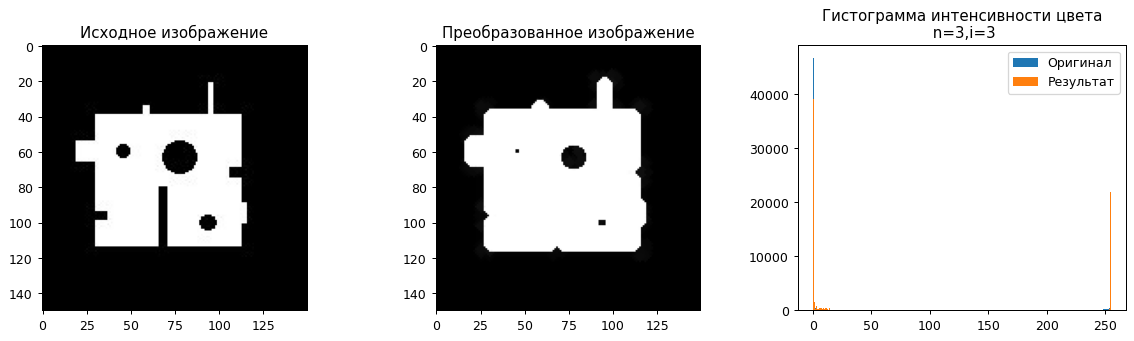

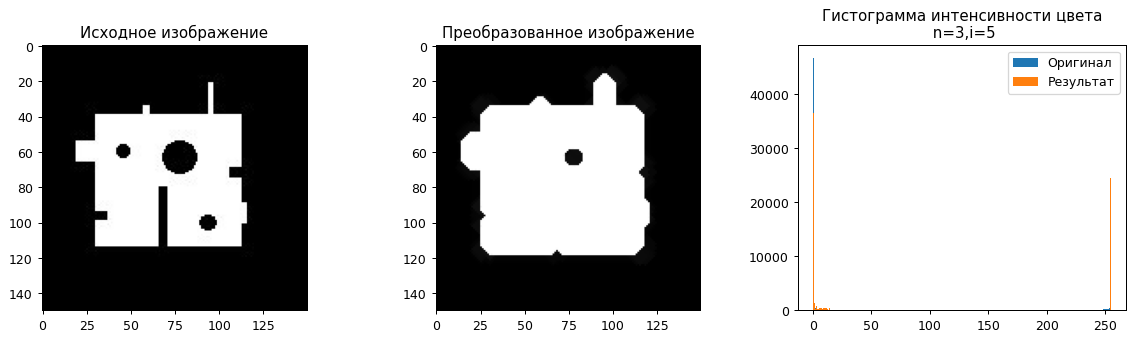

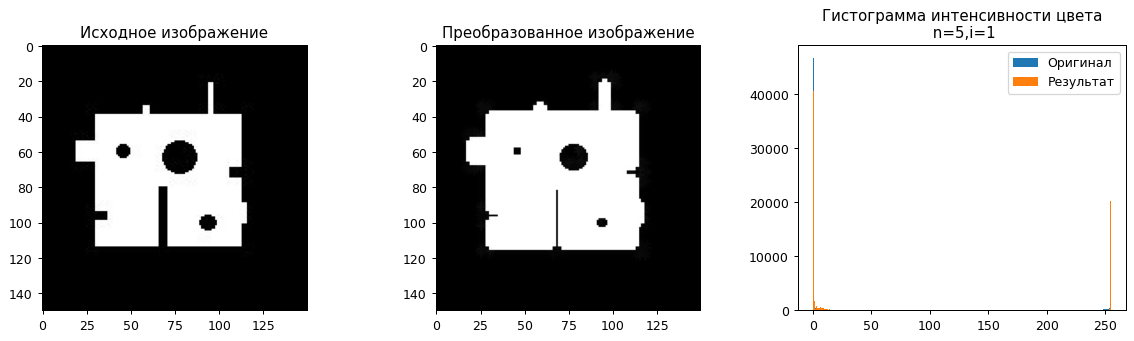

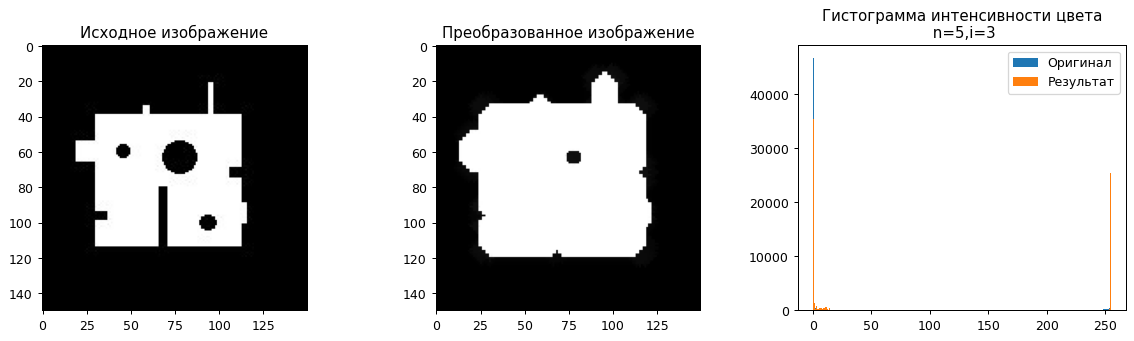

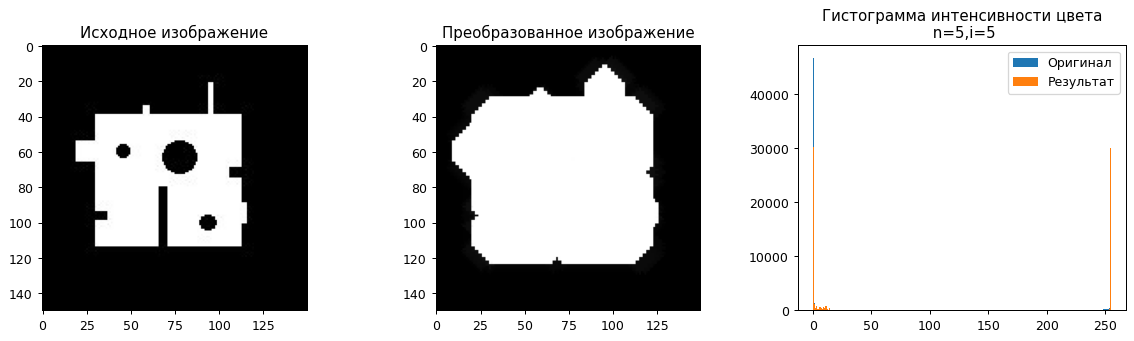

In [8]:
# Крест
for n in range(3, 6, 2):
  for i in range(1, 6, 2):
    dilate2(n, i)

Существенно видно отличие на больших размерах матрицы.
Большая деформация объекта снаружи (можно сказать, что внутренние дефекты изчезли, но также сильно изменился и контур объекта, что особенно видно на последниъ изображениях)

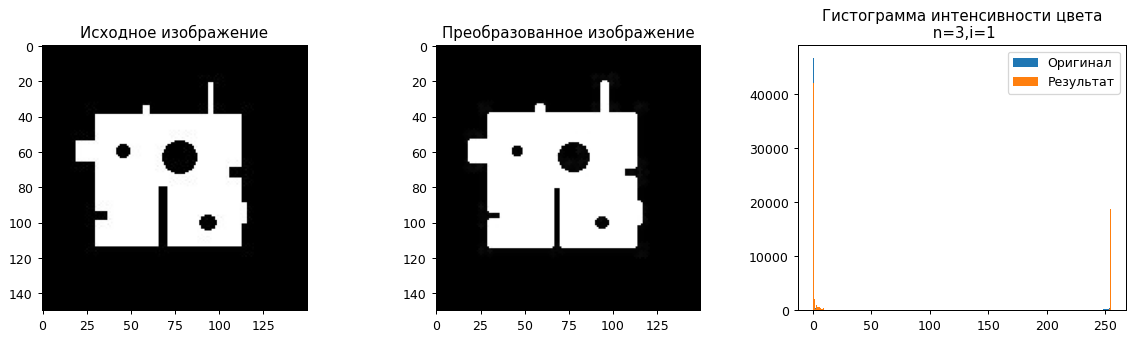

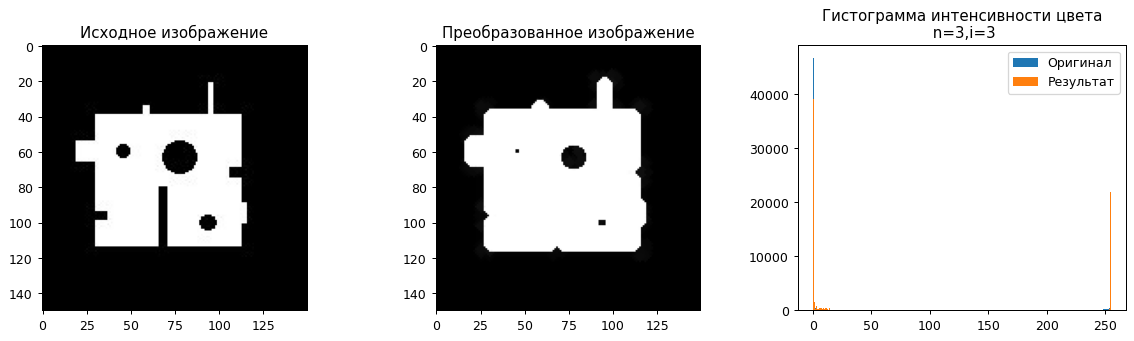

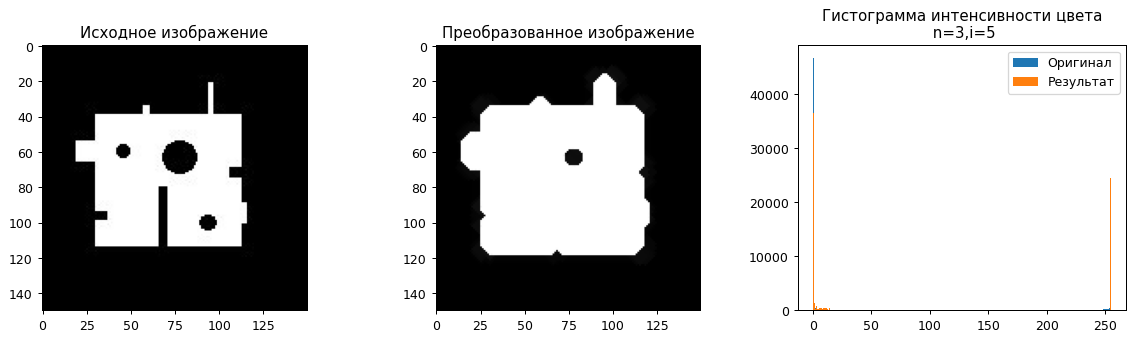

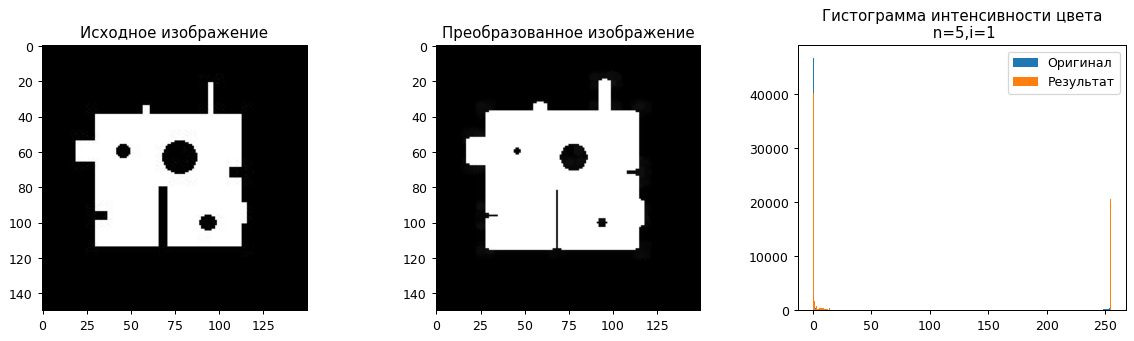

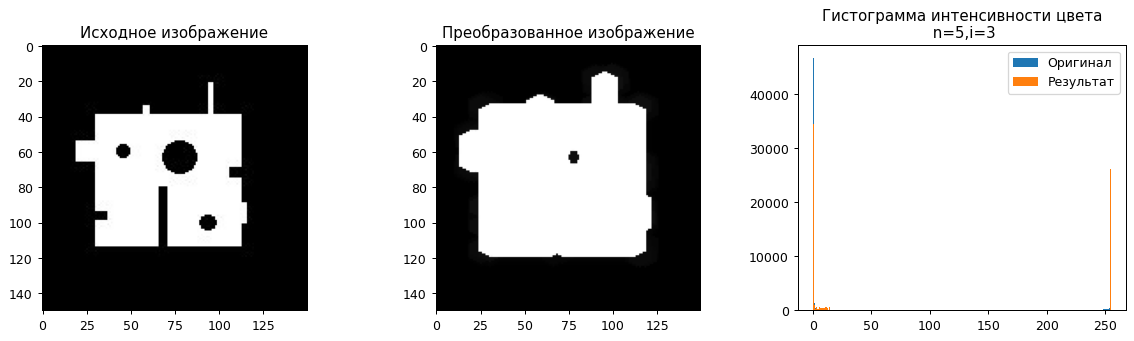

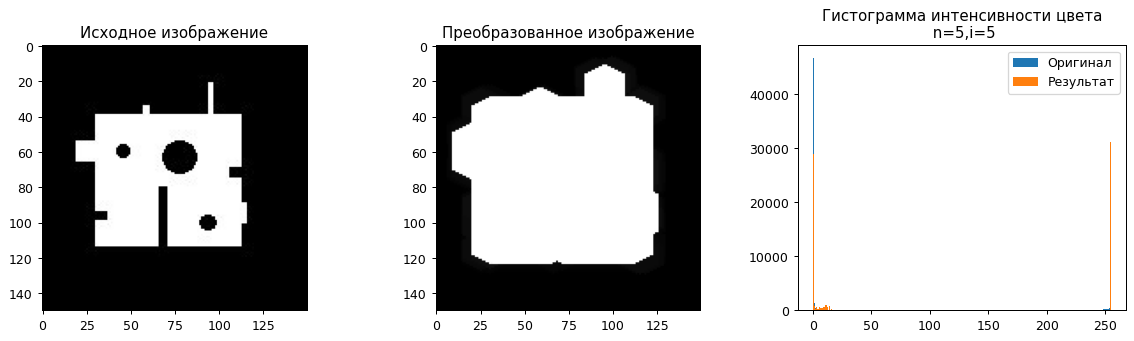

In [9]:
# Эллипс
for n in range(3, 6, 2):
  for i in range(1, 6, 2):
    dilate3(n, i)

Аналогичная работа, что и дилатация, но уже меняем метод на cv2.erode

In [11]:
def eroz1(n, i): # Прямоугольник
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (n, n))
  transform_img = cv2.erode(img8, kernel, iterations = i)
  draw_image3(img8, transform_img, n, i)

def eroz2(n, i): # Крест
  kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (n, n))
  transform_img = cv2.erode(img8, kernel, iterations = i)
  draw_image3(img8, transform_img, n, i)

def eroz3(n, i): # Эллипс
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (n, n))
  transform_img = cv2.erode(img8, kernel, iterations = i)
  draw_image3(img8, transform_img, n, i)

Обратная ситуация - эррозия "съедает" фигуру, контур дефектов расширяется, поглащая фигуру всё больше и больше.

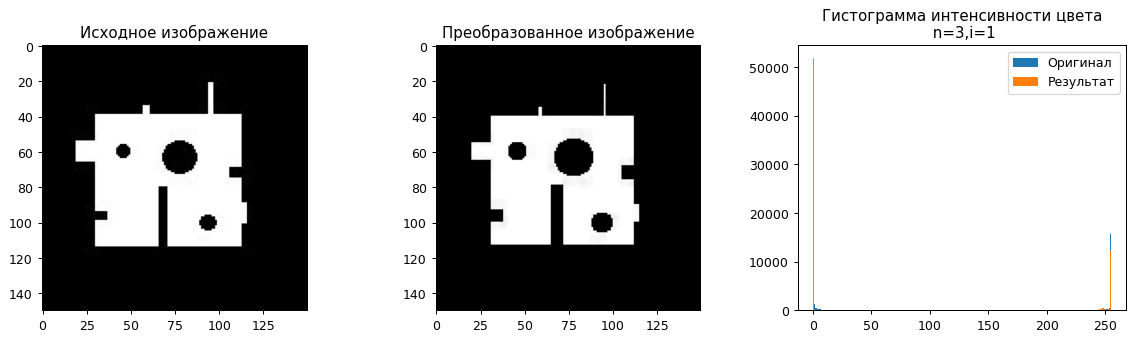

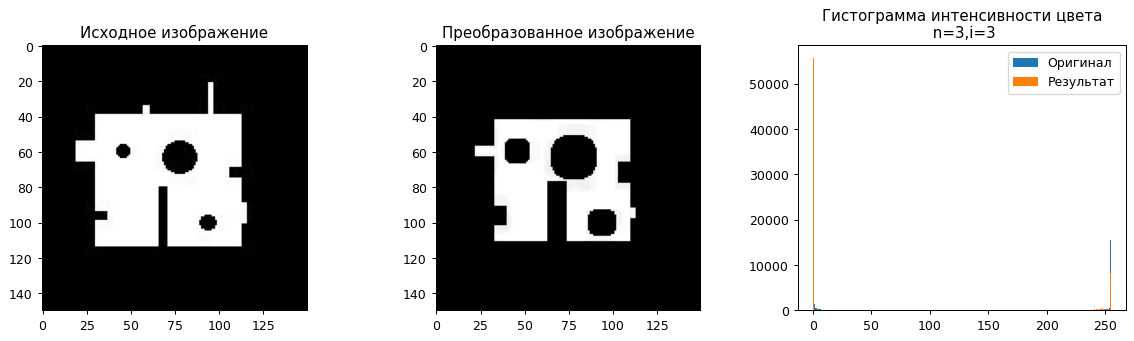

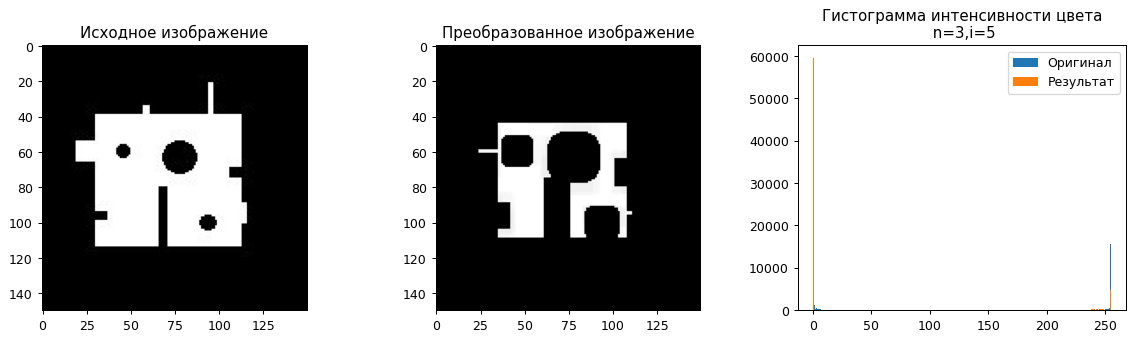

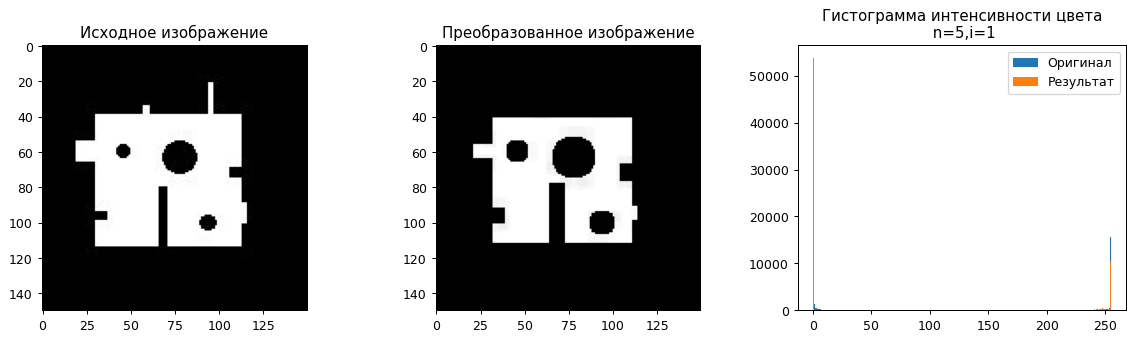

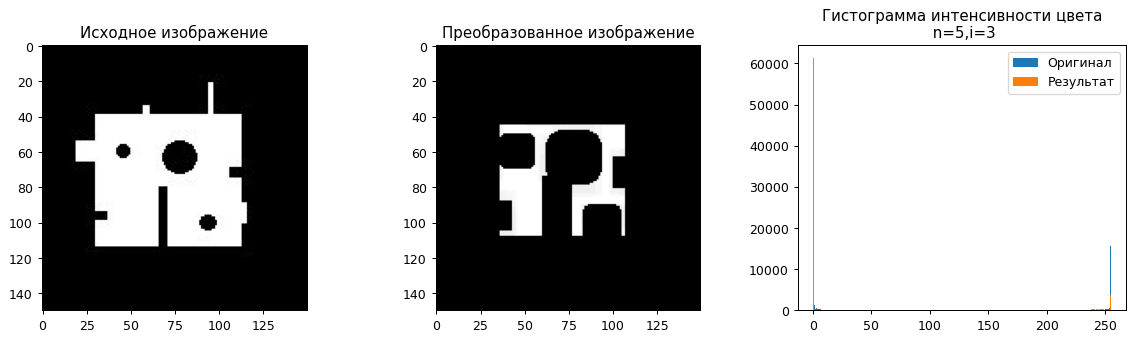

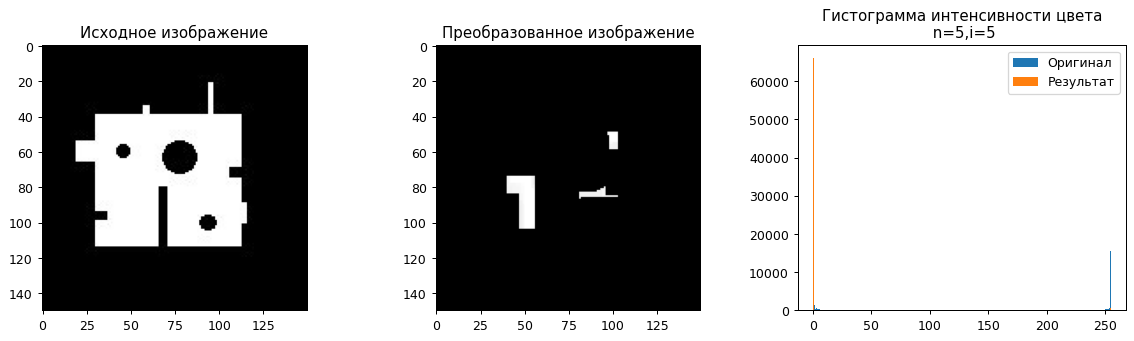

In [12]:
# Прямоугольник
for n in range(3, 6, 2):
  for i in range(1, 6, 2):
    eroz1(n, i)

Дефекты сильно похожи на свой структурный элемент - на форму креста, как видно напреобразованном изображении 2-3.

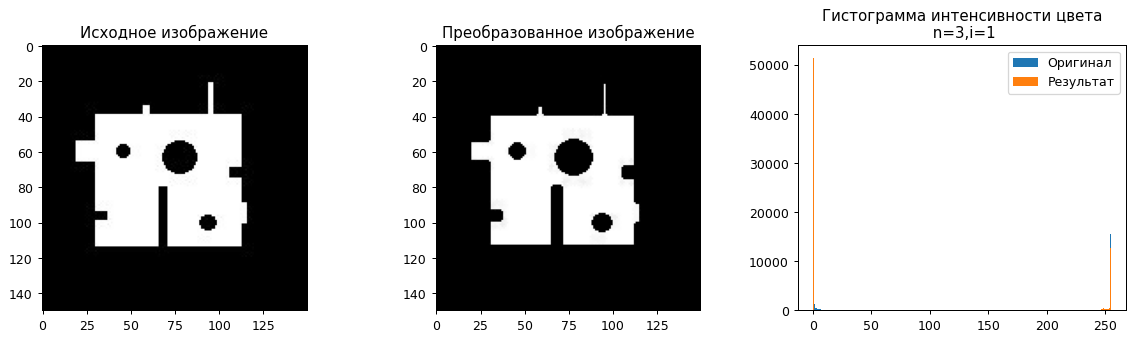

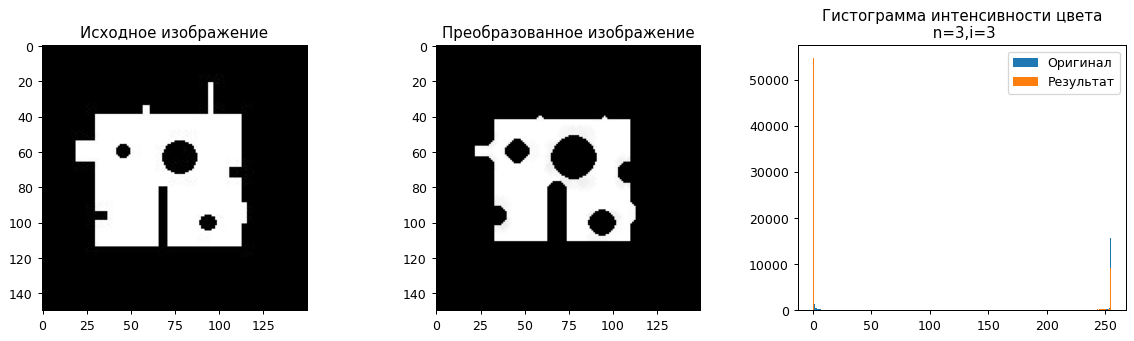

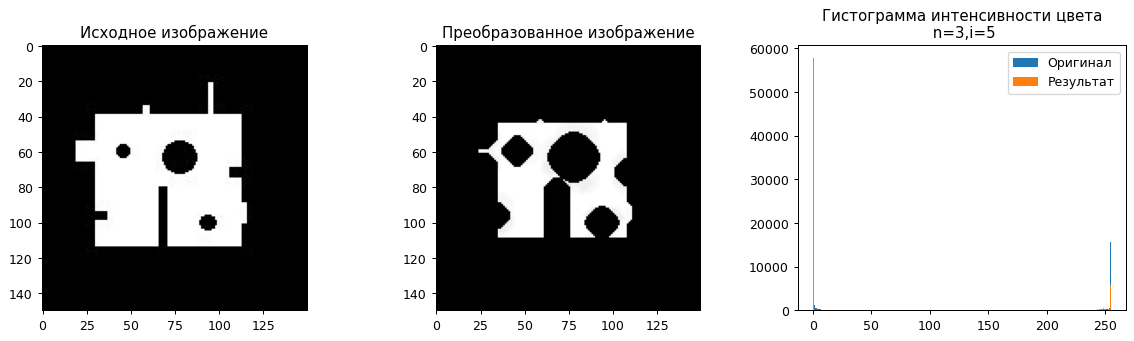

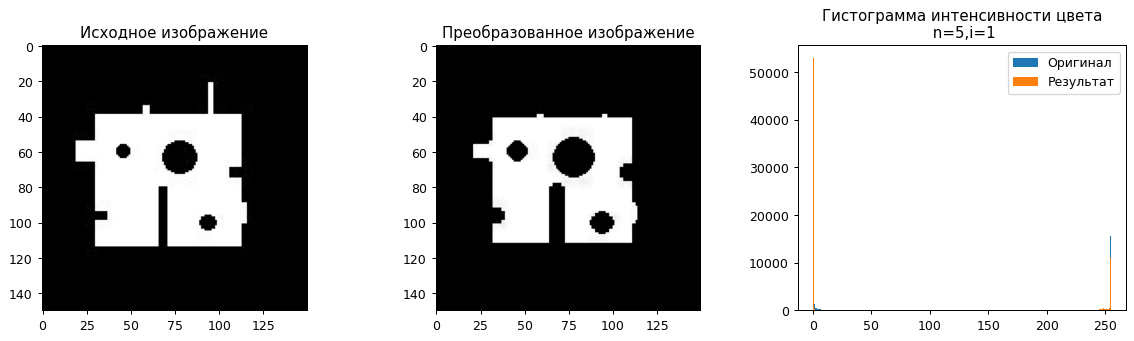

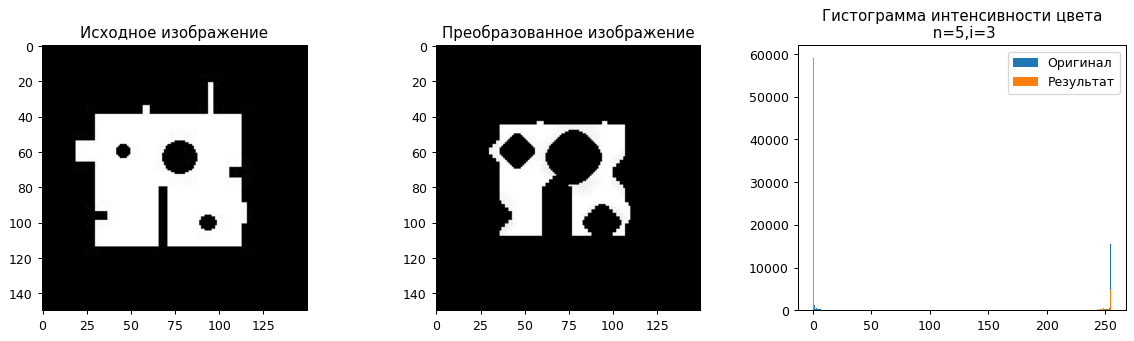

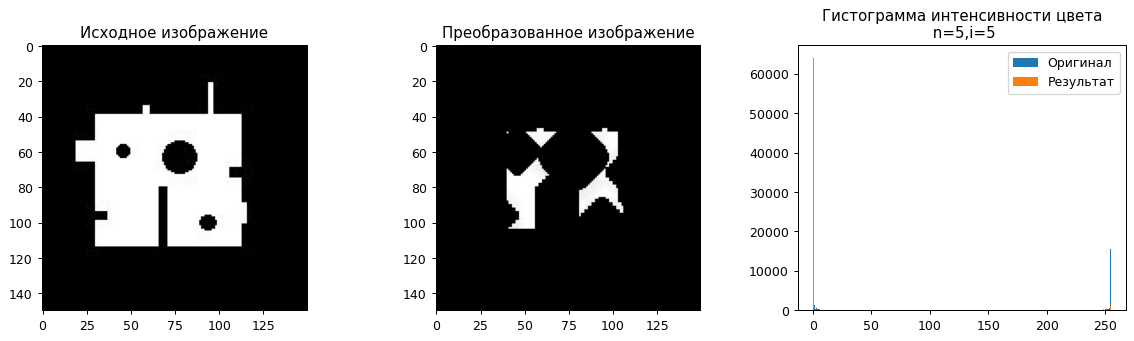

In [13]:
# Крест
for n in range(3, 6, 2):
  for i in range(1, 6, 2):
    eroz2(n, i)

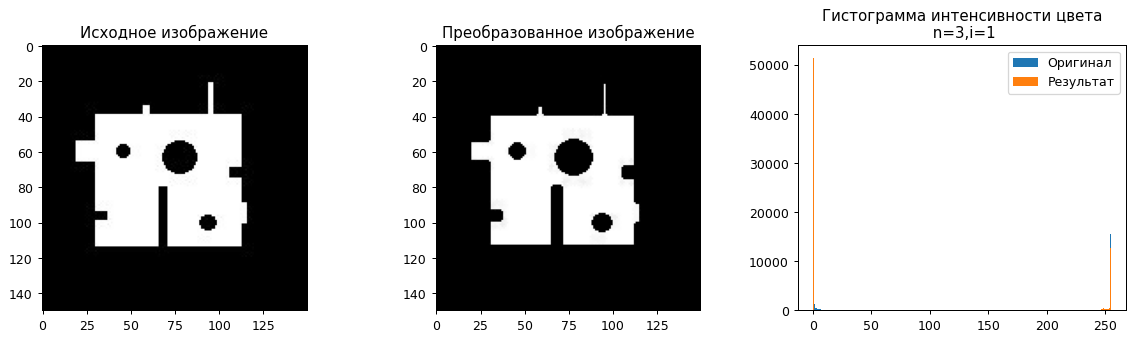

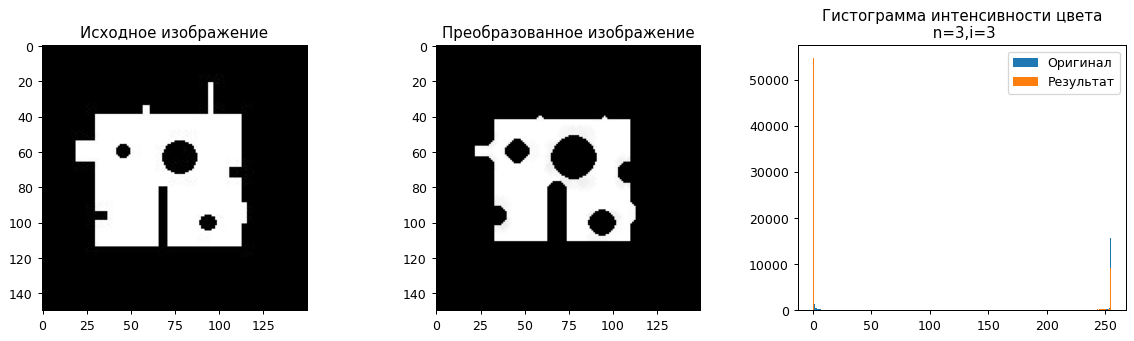

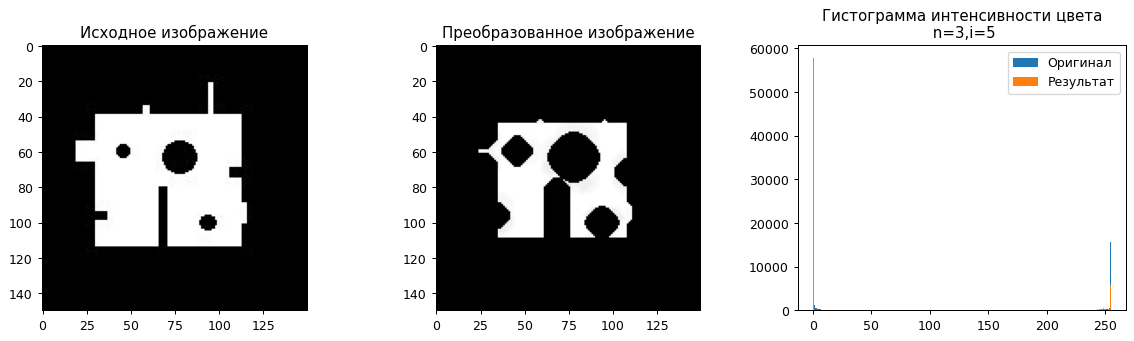

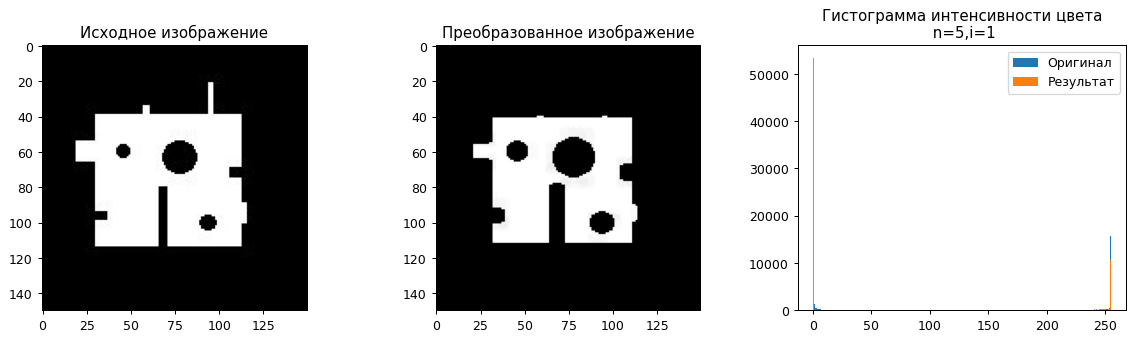

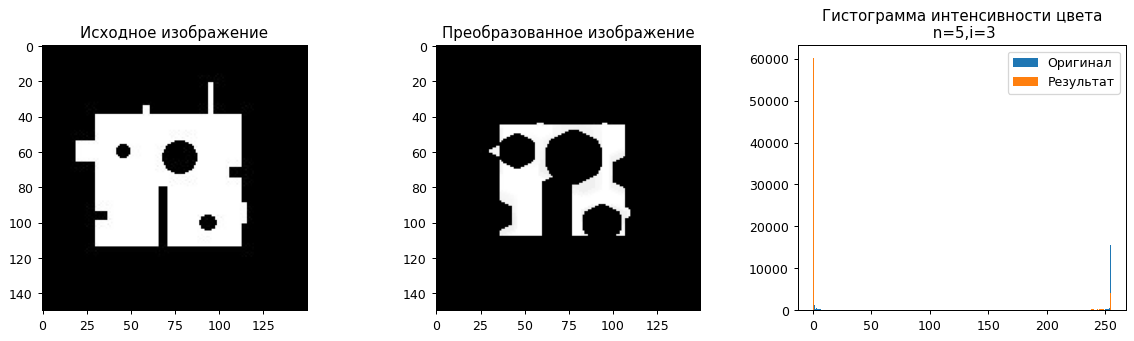

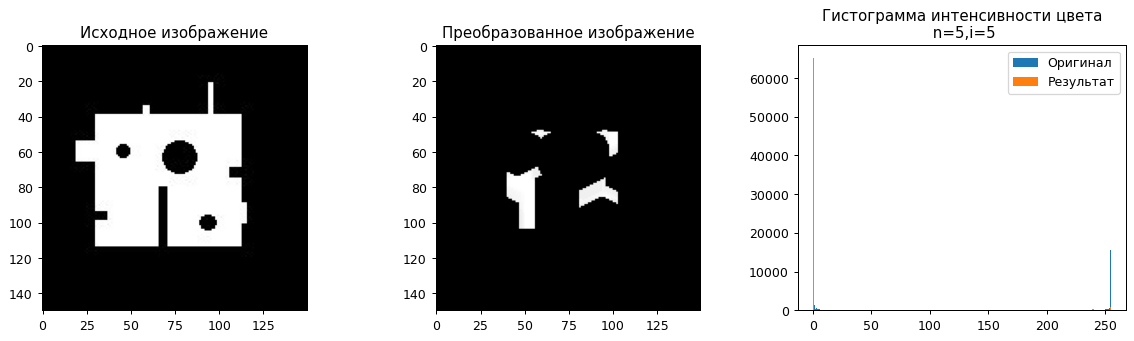

In [14]:
# Эллипс
for n in range(3, 6, 2):
  for i in range(1, 6, 2):
    eroz3(n, i)

###**2. Попробуйте сравнить результаты операции закрытия с результатами последовательного применения дилатации и эрозии:**

**close(A,B)=er(dil(A,B),B)**

**ЗАКРЫТИЕ - включает расширение, за которым следует эрозия внешней поверхности(переднего плана изображения)**

In [15]:
def draw_img4(image, imageNew):
 plt.figure(figsize=(16,13), dpi=90)
 plt.subplot2grid((3,3), (0,0))
 plt.imshow(image)
 plt.title('Исходное изображение')
 plt.subplot2grid((3,3), (0,1))
 plt.imshow(imageNew)
 plt.title('Преобразованное изображение')
 #Гистограммы двух изображений
 plt.subplot2grid((3,3), (0,2))
 plt.hist(np.ravel(image), bins=256, label=['Оригинал'])
 plt.hist(np.ravel(imageNew), bins=256, label=['Результат'])
 plt.title('Гистограмма интенсивности цвета')
 plt.legend()
 plt.show()


Нет сильно видимых отличий, только практические незаметные искажения на краях объекта


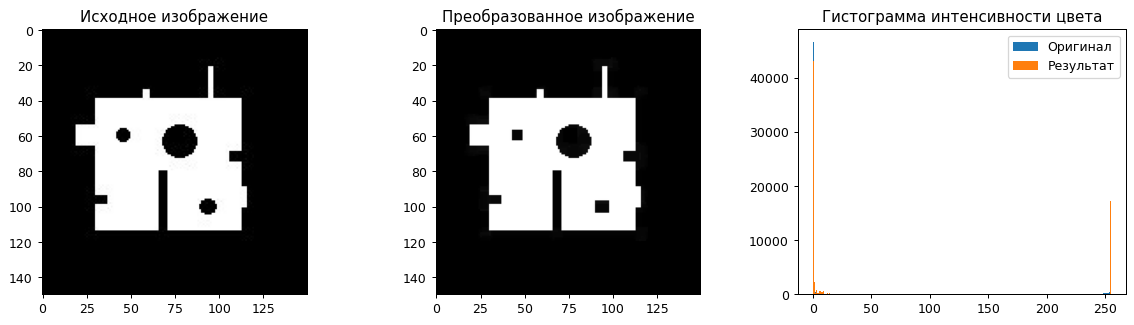

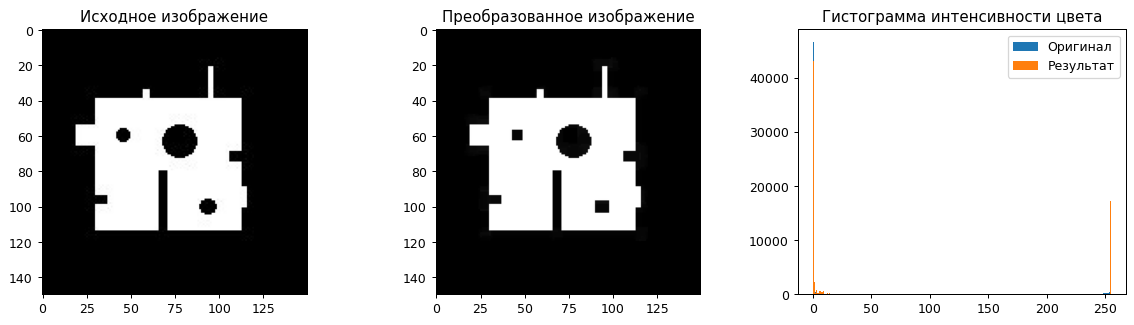

In [16]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
transform_img = cv2.erode(cv2.dilate(img8, kernel, iterations = 1), kernel, iterations = 1)
close_img = cv2.morphologyEx(img8, cv2.MORPH_CLOSE, kernel, iterations = 1)

draw_img4(img8, transform_img)
draw_img4(img8, close_img)

###**3. Попробуйте сравнить результаты операции открытия с результатами последовательного применения эрозии и дилатации:**
**open(A,B) =dil(er(A,B),B)**

Пропали внешние дефекты, на внутренние дефекты почти не повлияло

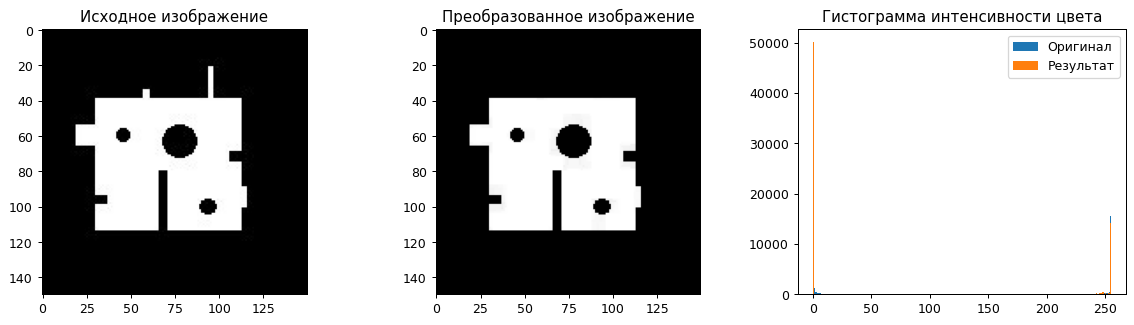

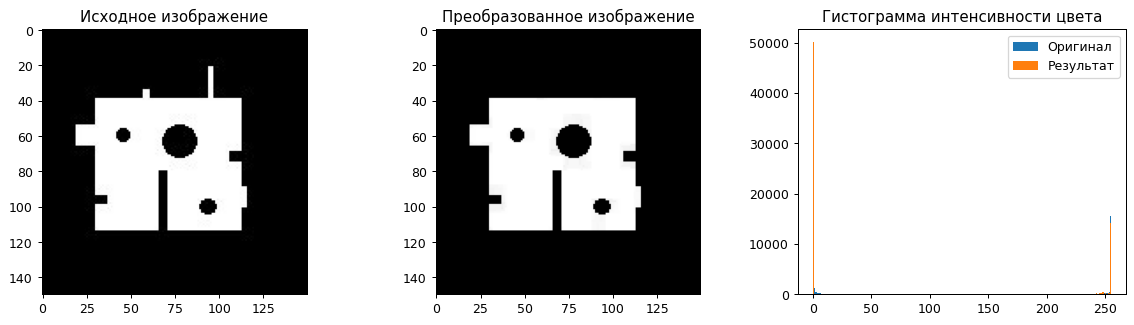

In [17]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
transform_img = cv2.dilate(cv2.erode(img8, kernel, iterations = 1), kernel, iterations = 1)
open_img = cv2.morphologyEx(img8, cv2.MORPH_OPEN, kernel, iterations = 1)

draw_img4(img8, transform_img)
draw_img4(img8, open_img)

###**4. Для всех изображений найдите границы, используя определение:**

**boundary(A,B) = A – er(A,B)**

**Поэкспериментируйте со структурными элементами и их размерами. Какие результаты наиболее предпочтительны? Почему?**

Выделение контура происходит из разницы изначального и преобразованного изображения

In [18]:
def func4_rect(img, n, i):  #Прямоугольник
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (n, n))
  boundary_img = img - cv2.erode(img, kernel, iterations = i)
  draw_image3(img, boundary_img, n, i)

def func4_cross(img, n, i): #Крест
  kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (n, n))
  boundary_img = img - cv2.erode(img, kernel, iterations = i)
  draw_image3(img, boundary_img, n, i)

def func4_el(img, n, i):  #Эллипс
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (n, n))
  boundary_img = img - cv2.erode(img, kernel, iterations = i)
  draw_image3(img, boundary_img, n, i)

Для структурного элемента "прямоугольник" хорошо подходит размер 5х5 с итерацией = 1: линии контура одинаковой толщины и проще определить контур объекта (более качественное определение границ)

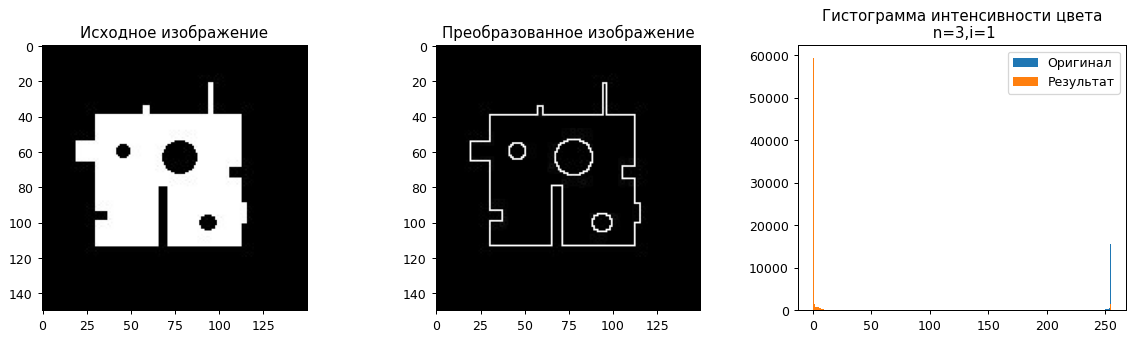

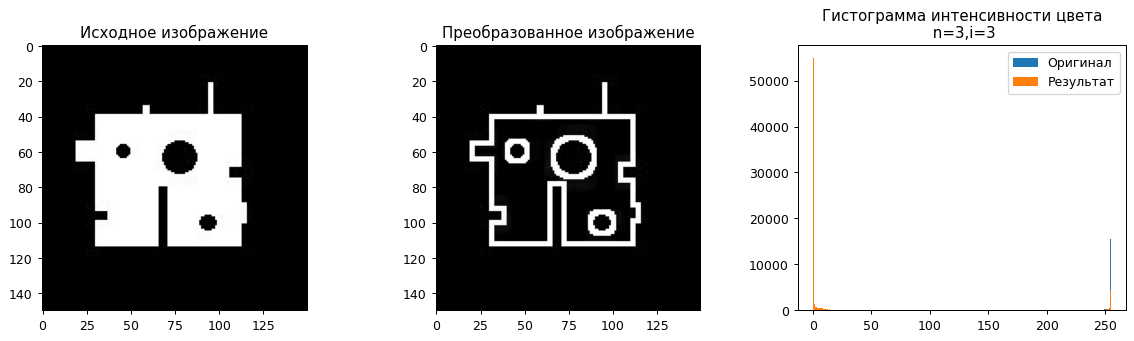

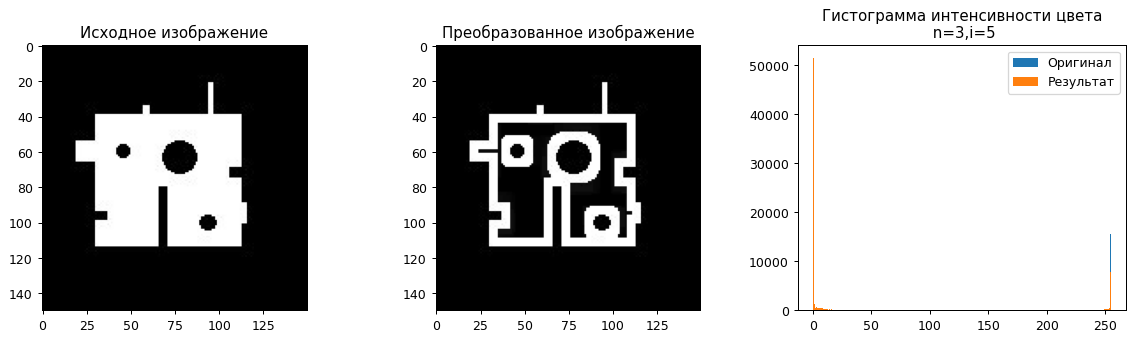

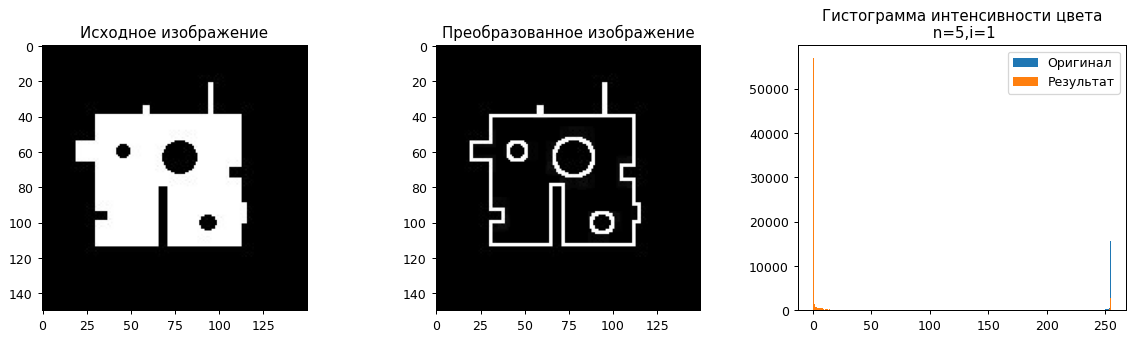

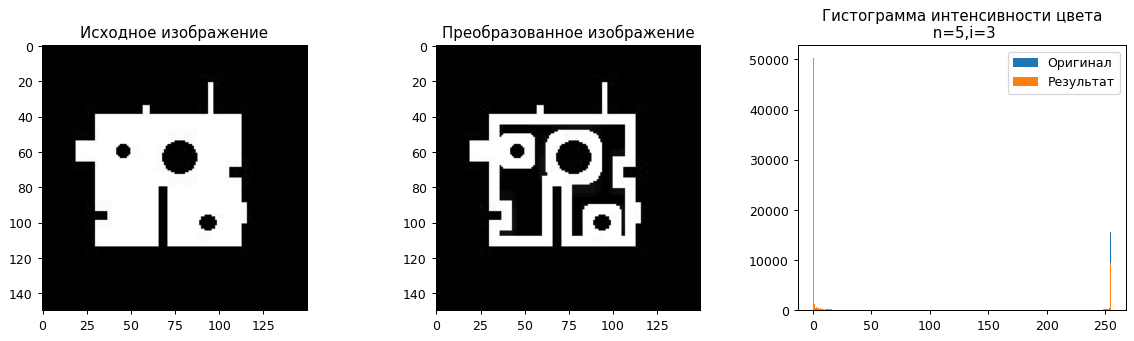

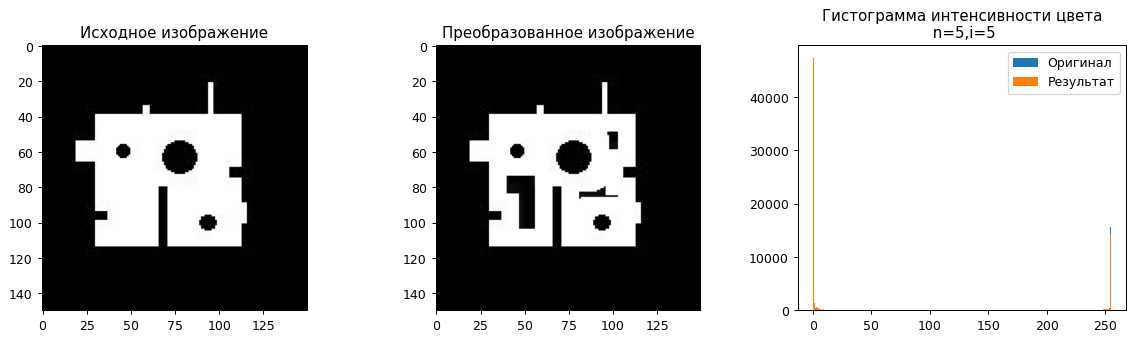

In [19]:
for n in range(3, 6, 2):
  for i in range(1, 6, 2):
    func4_rect(img8, n, i)

Для структурного элемента "крест" предпочтительны размены 3х3 и итерация 3: линия границы достаточно "плотная" и хорошо различима (проще определить границы объекта)

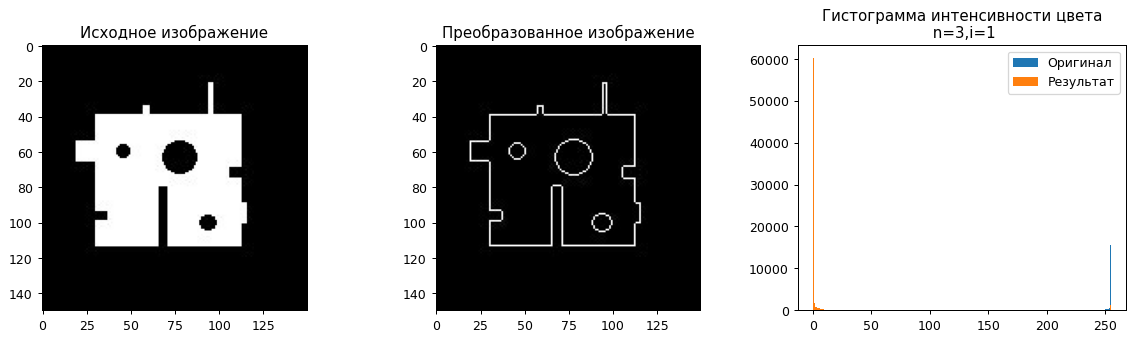

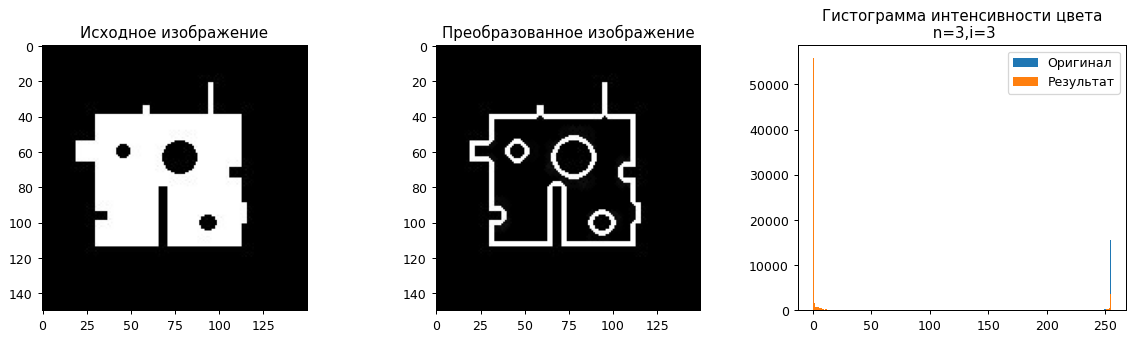

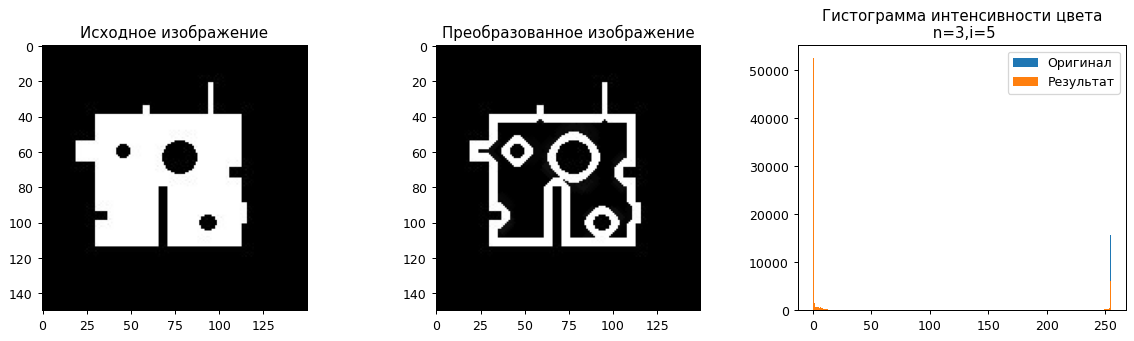

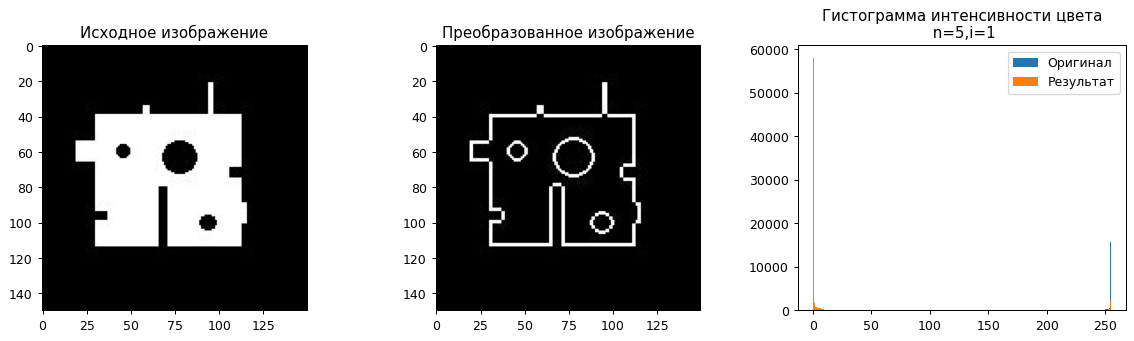

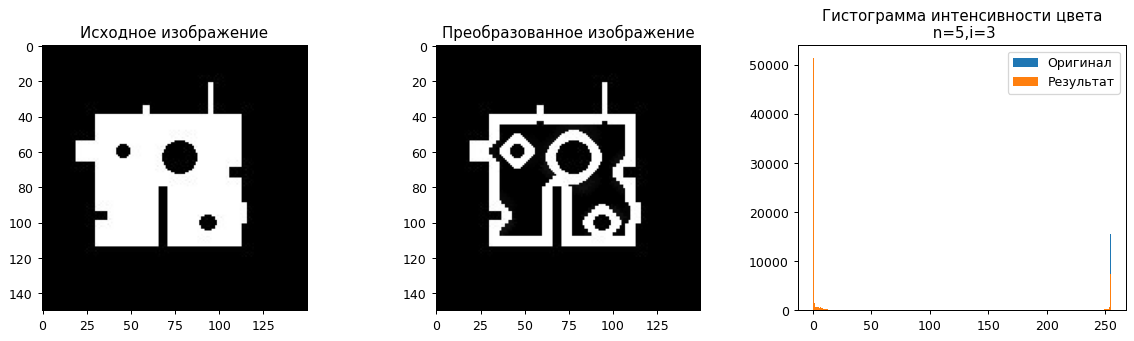

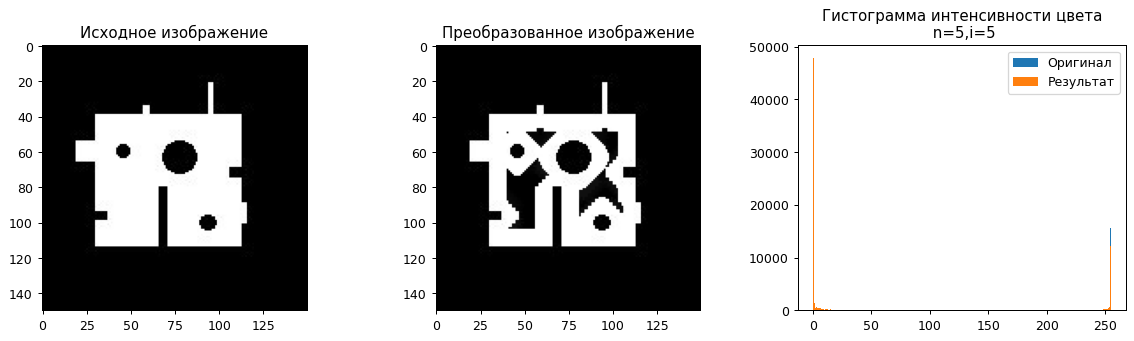

In [20]:
for n in range(3, 6, 2):
  for i in range(1, 6, 2):
    func4_cross(img8, n, i)

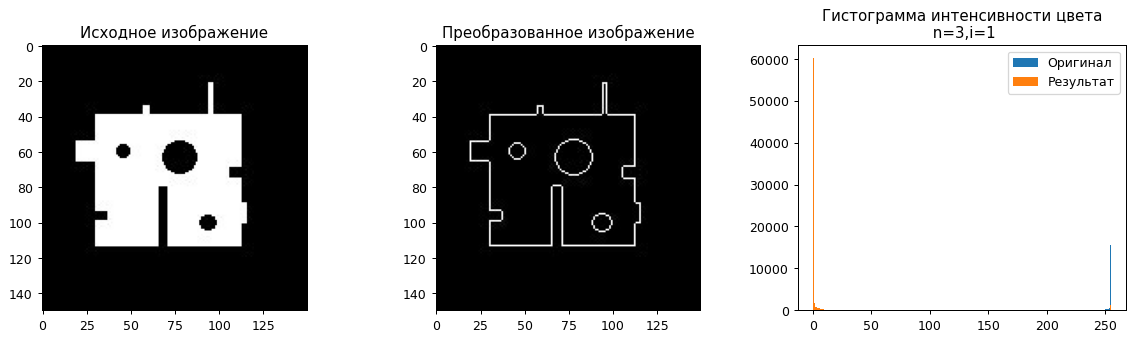

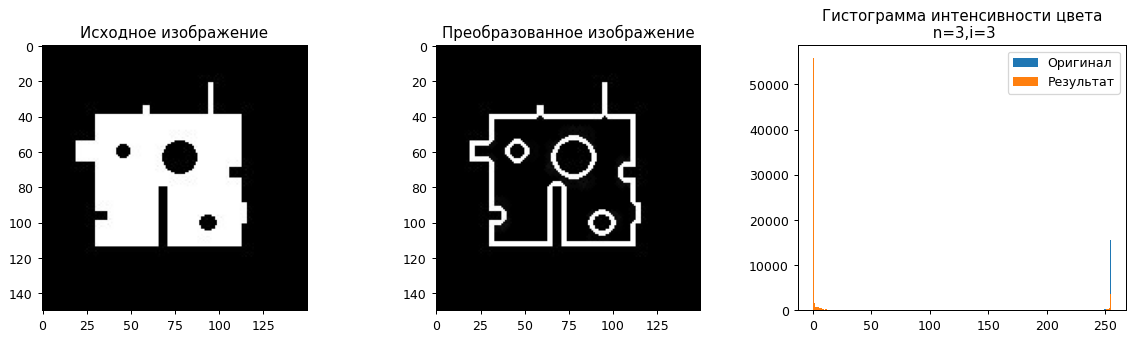

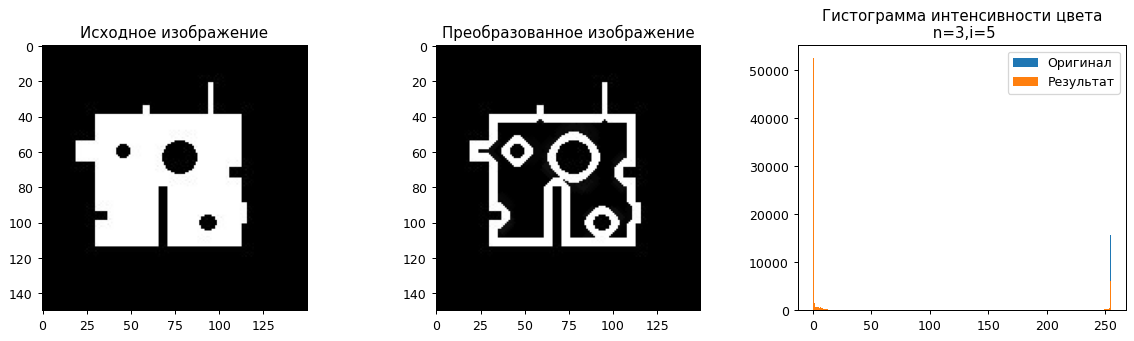

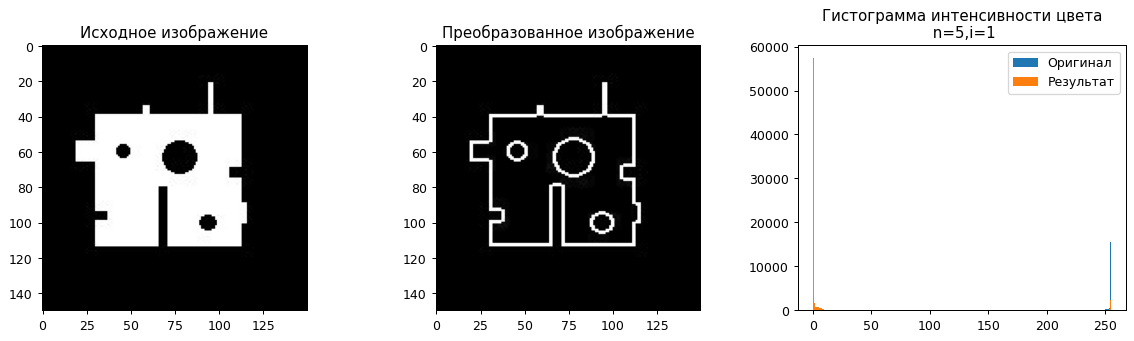

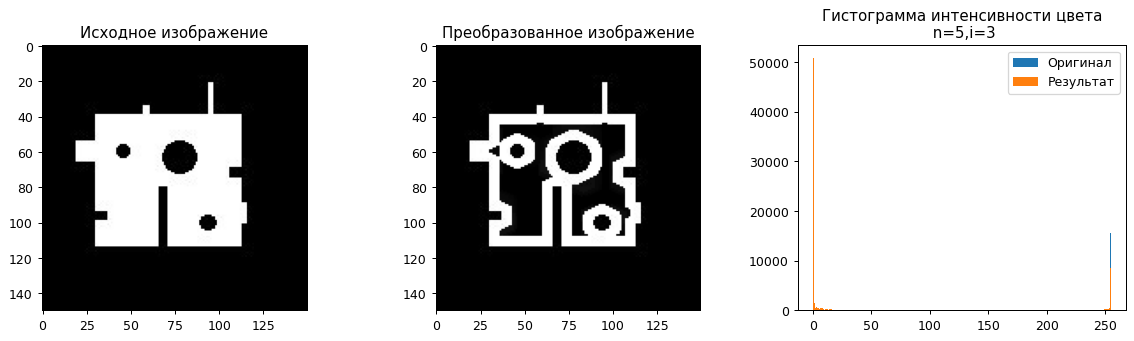

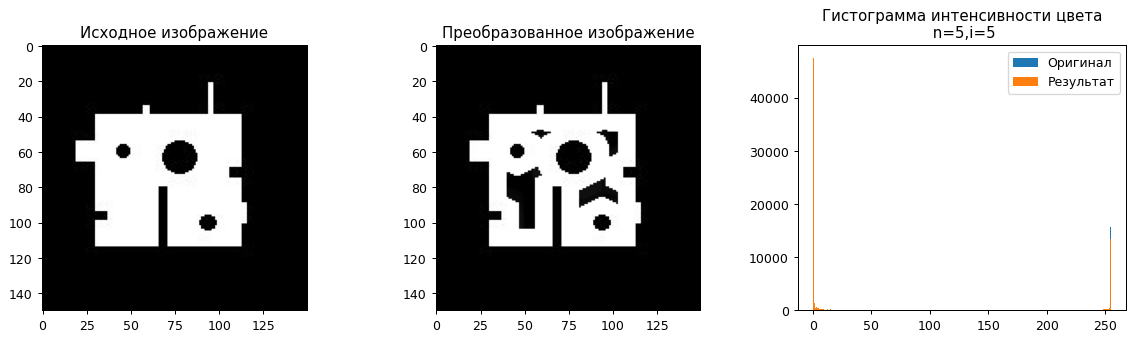

In [21]:
for n in range(3, 6, 2):
  for i in range(1, 6, 2):
    func4_el(img8, n, i)

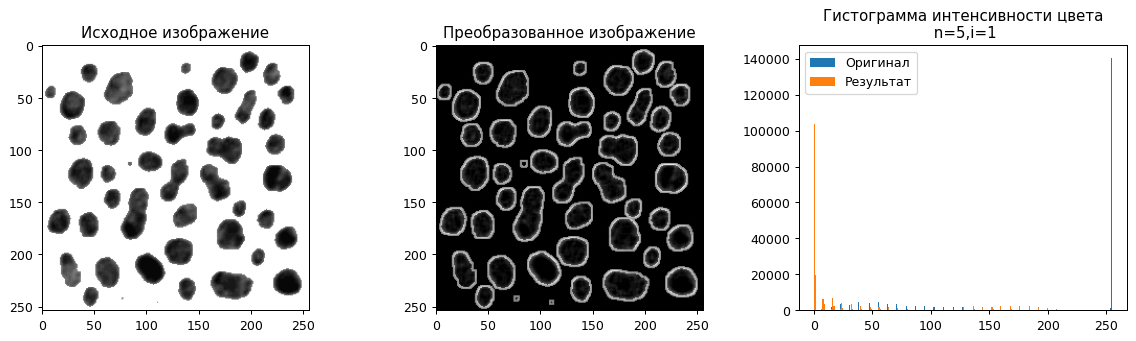

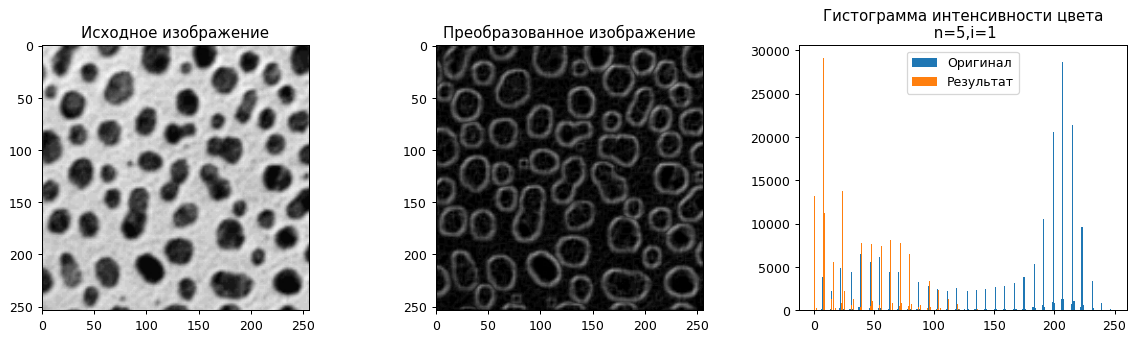

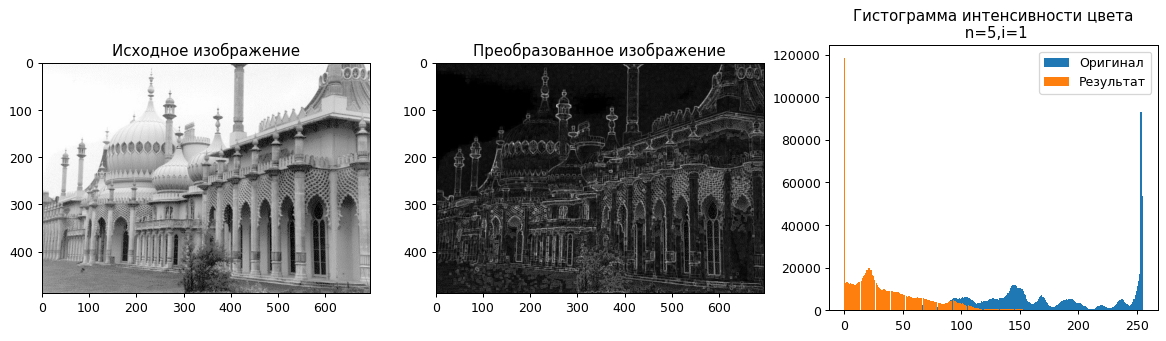

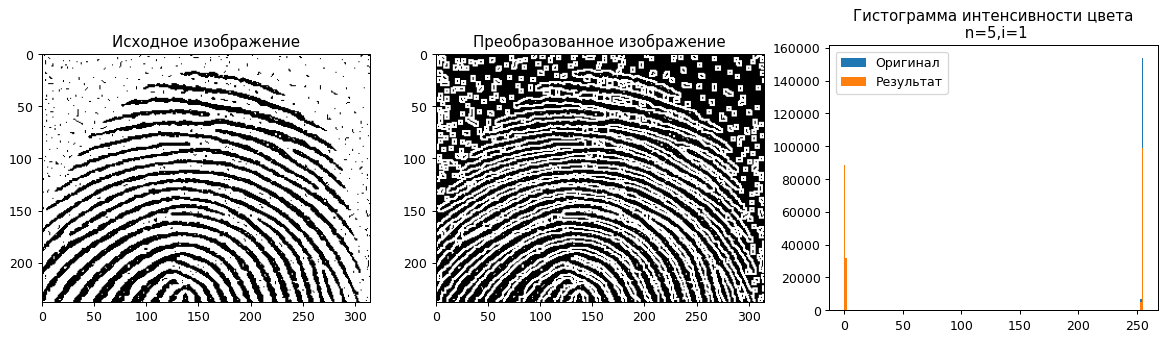

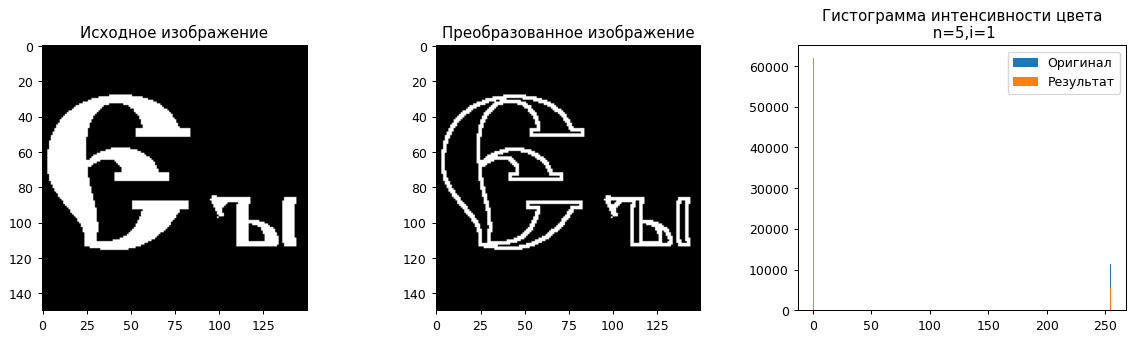

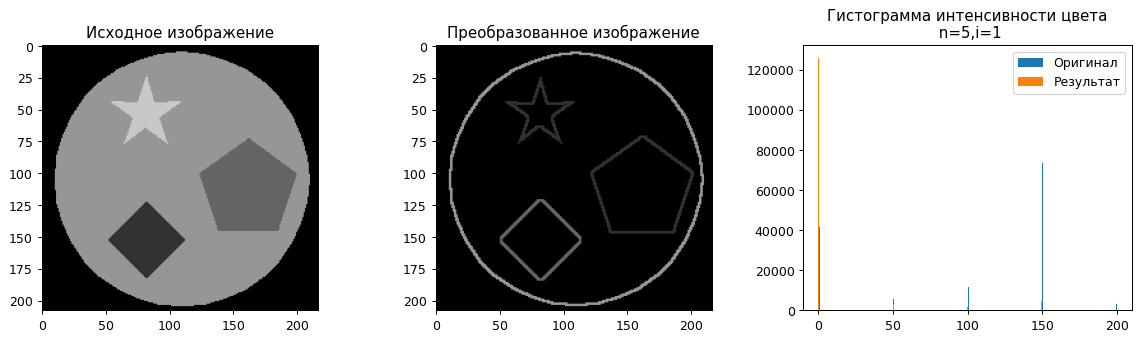

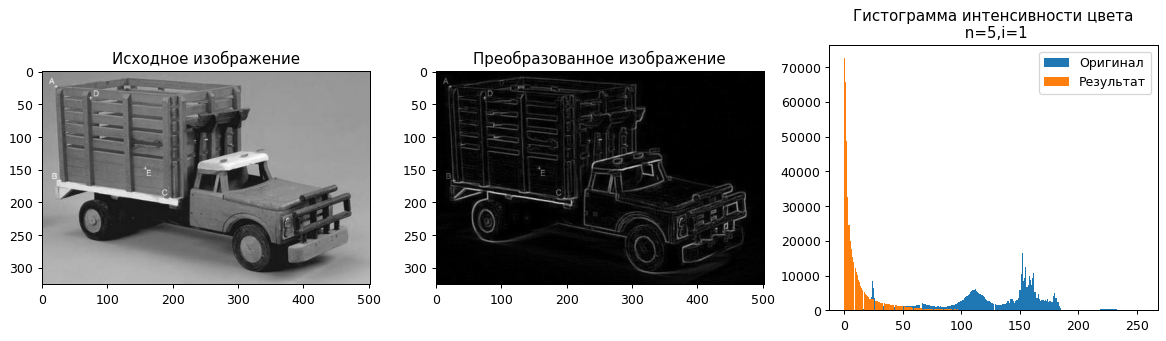

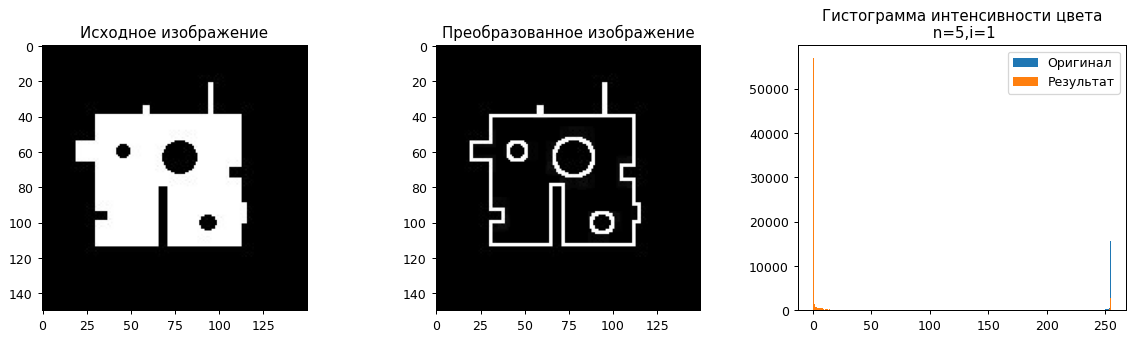

In [22]:
for j in all_img:
  func4_rect(j, 5, 1)

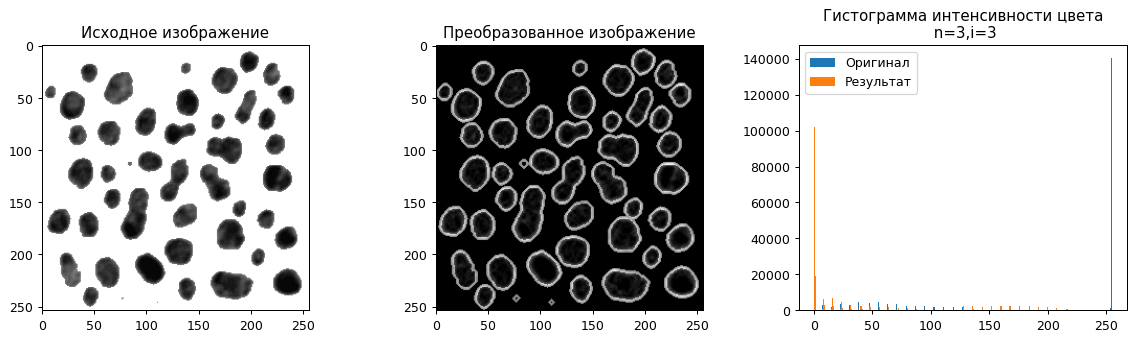

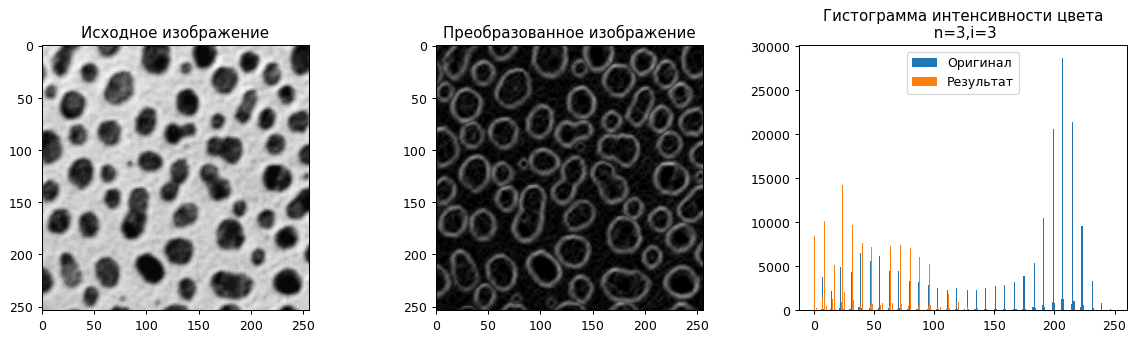

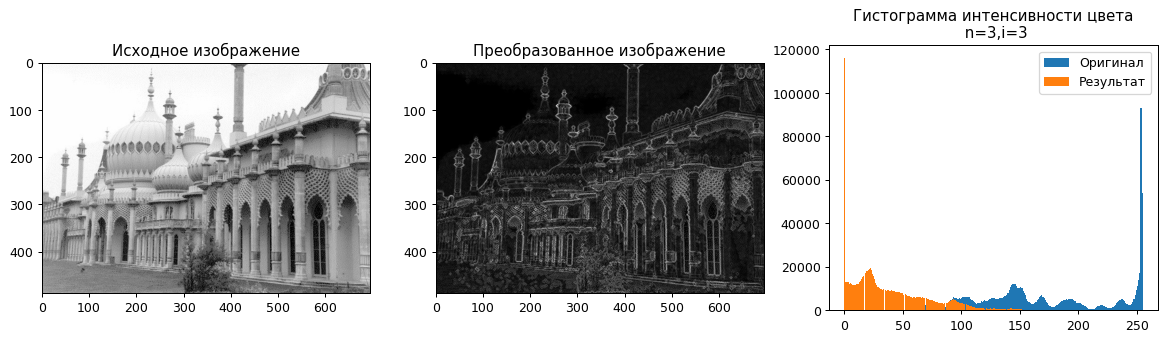

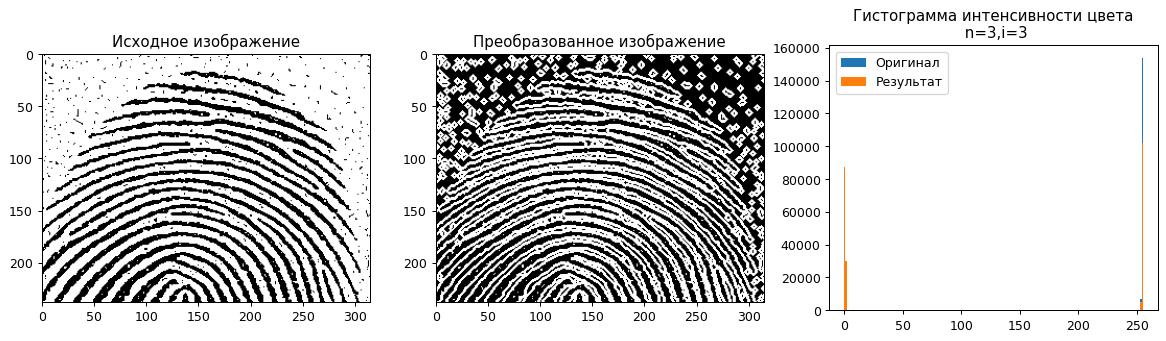

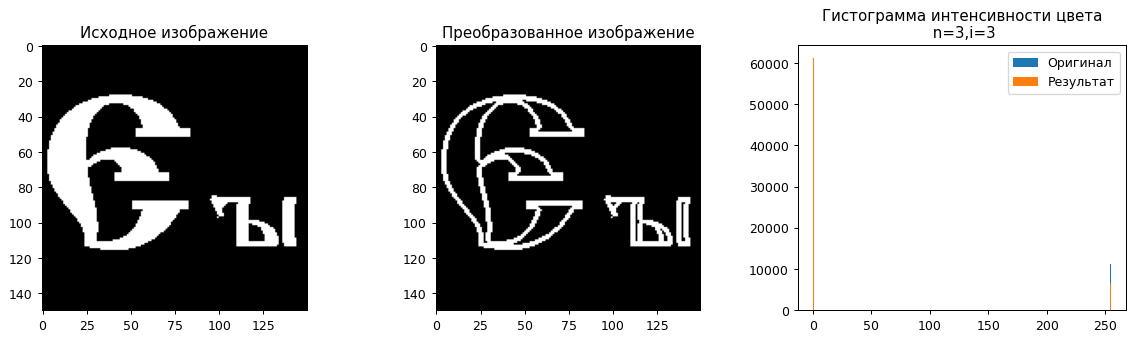

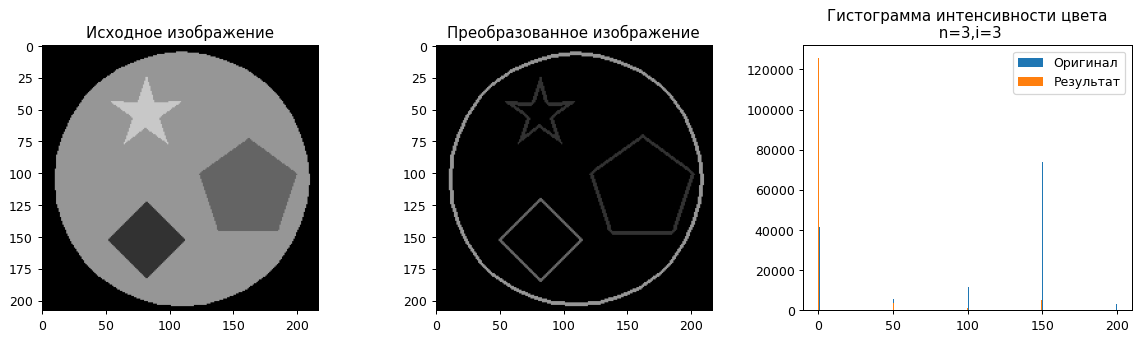

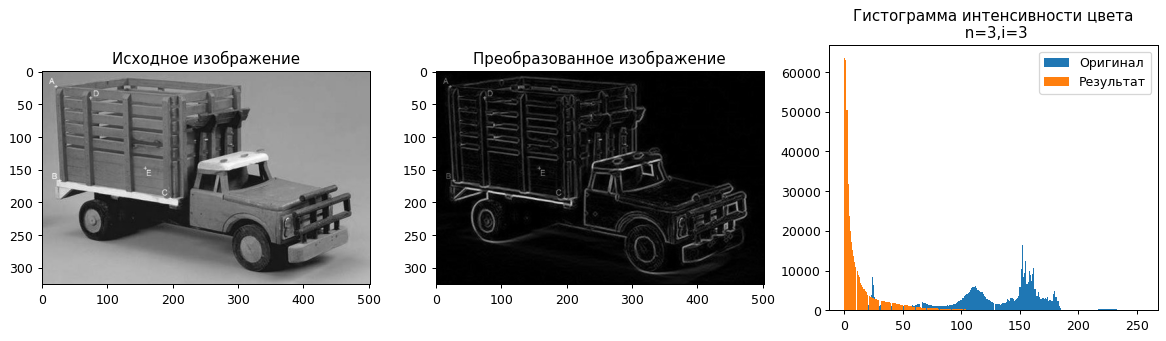

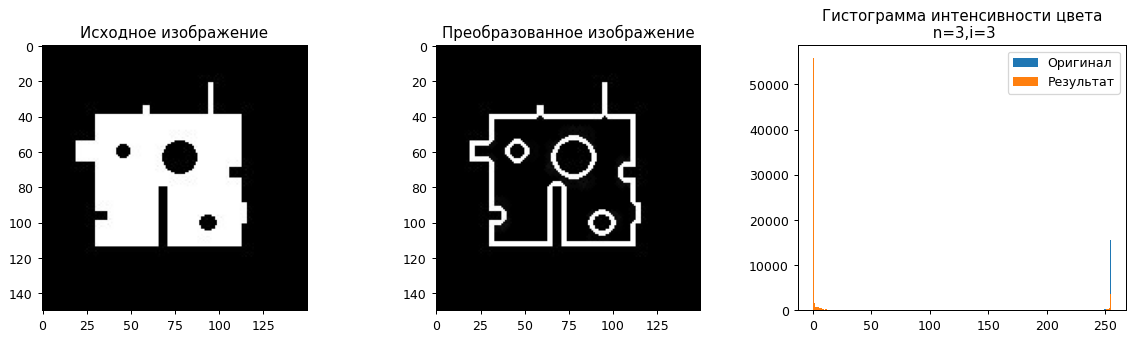

In [23]:
for j in all_img:
  func4_cross(j, 3, 3)

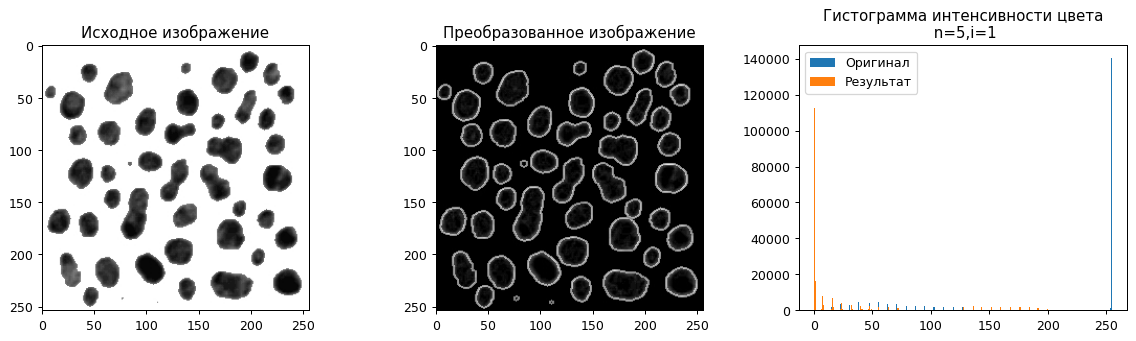

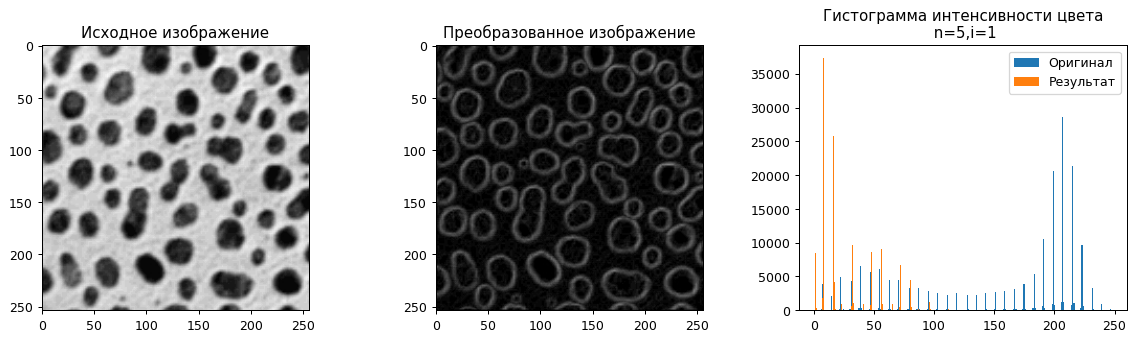

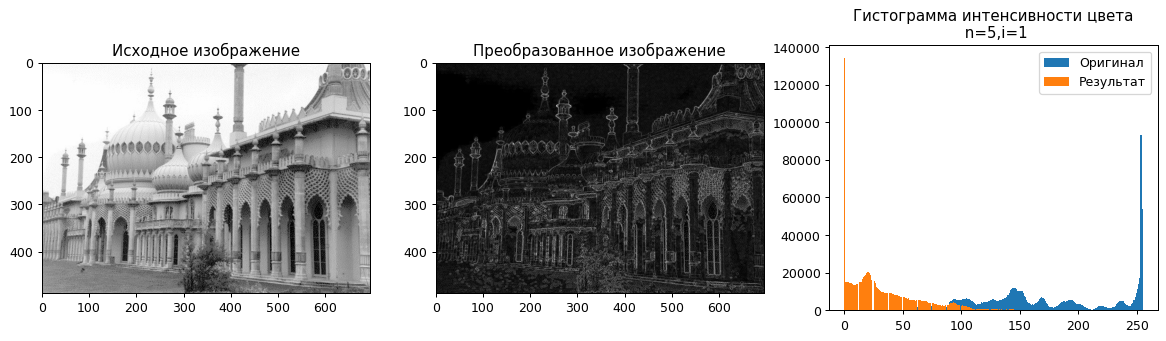

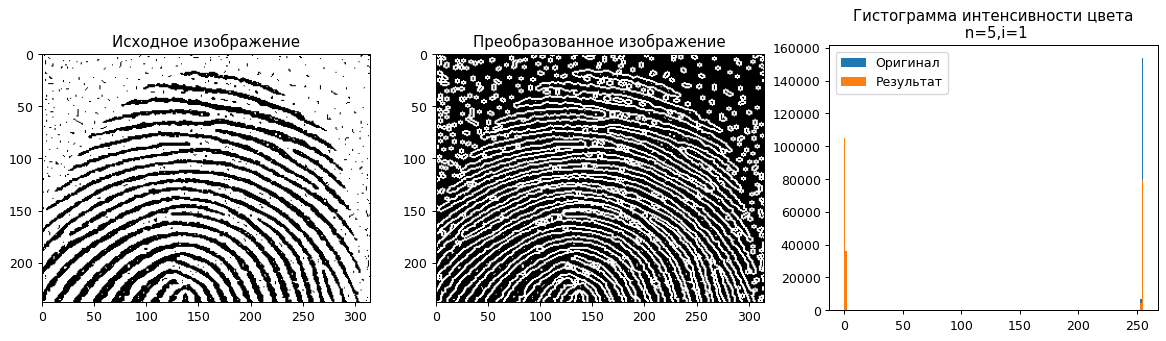

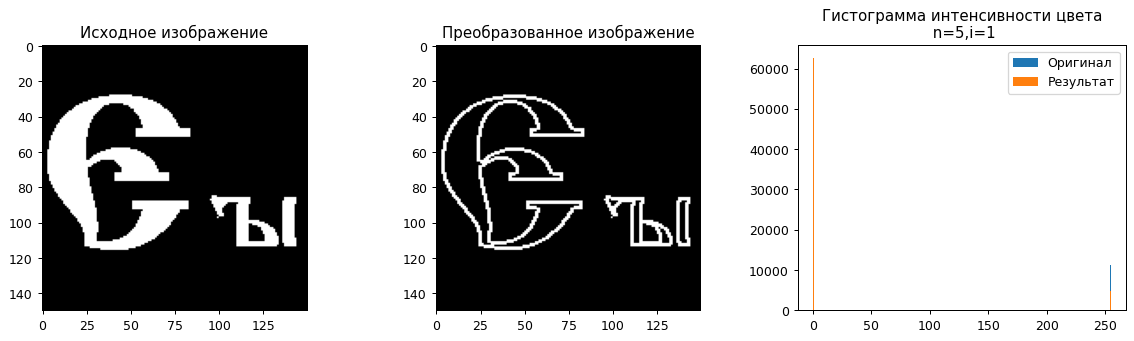

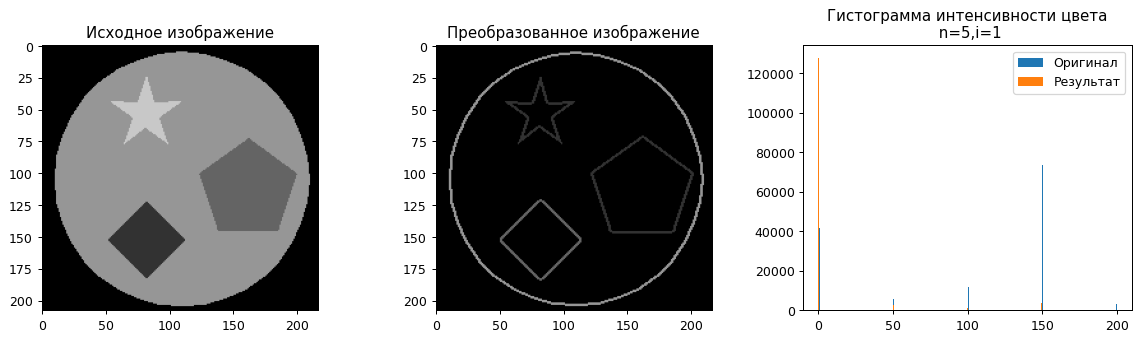

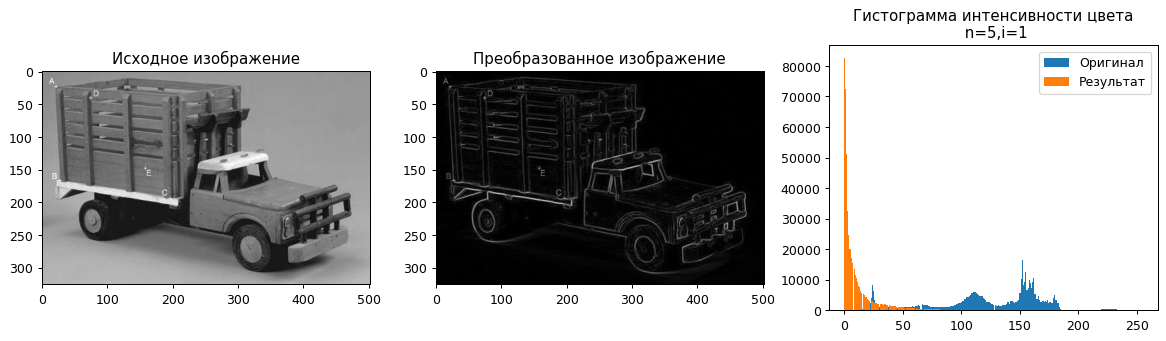

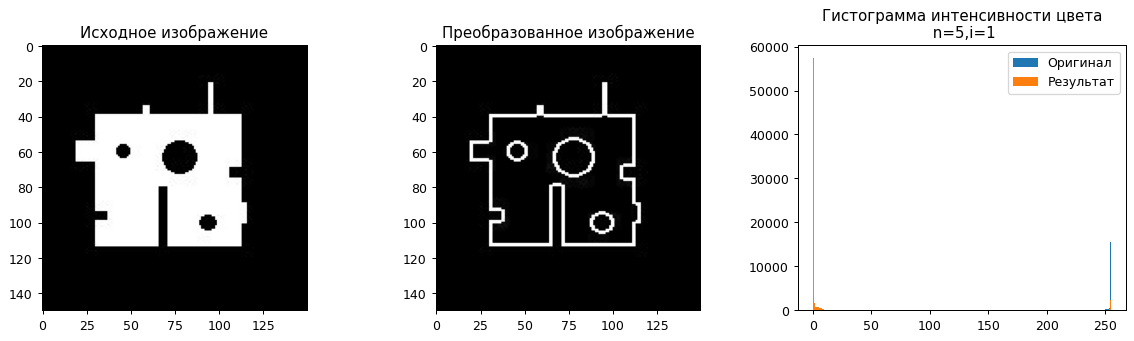

In [24]:
for j in all_img:
  func4_el(j, 5, 1)

###**5. Подберите структурный элемент, который бы наилучшим образом сглаживал углы на изображениях Morph.jpg и morph2.bmp. Какую из операций Вы использовали при этом и почему?**

In [25]:
def funk_el(image1, image2):
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
  open_img2 = cv2.morphologyEx(image1, cv2.MORPH_OPEN, kernel, iterations = 1) #операция открытия
  open_img = cv2.morphologyEx(image2, cv2.MORPH_OPEN, kernel, iterations = 1)

  draw_img4(image1, open_img2)
  draw_img4(image2, open_img)

def funk_rect(image1, image2):
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
  open_img2 = cv2.morphologyEx(image1, cv2.MORPH_OPEN, kernel, iterations = 1) #операция открытия
  open_img = cv2.morphologyEx(image2, cv2.MORPH_OPEN, kernel, iterations = 1)

  draw_img4(image1, open_img2)
  draw_img4(image2, open_img)

Структурный элемент "эллипс" прекрасно сглаживает углы, это явно видно на первом изображении с фигурой. Объект стал более "округлым".

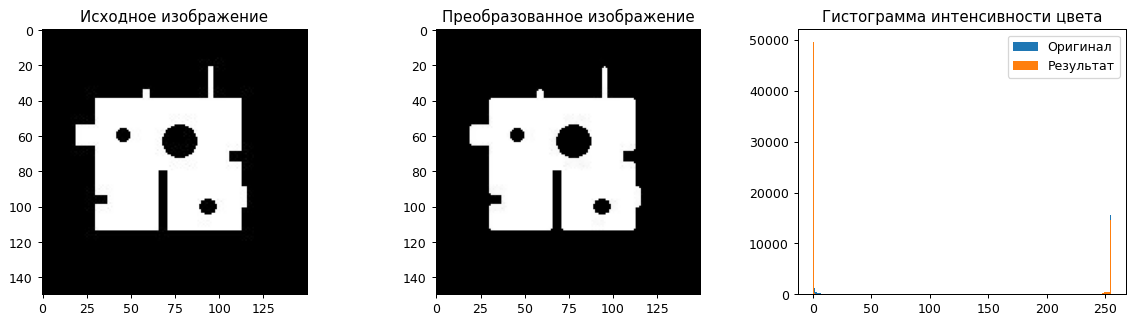

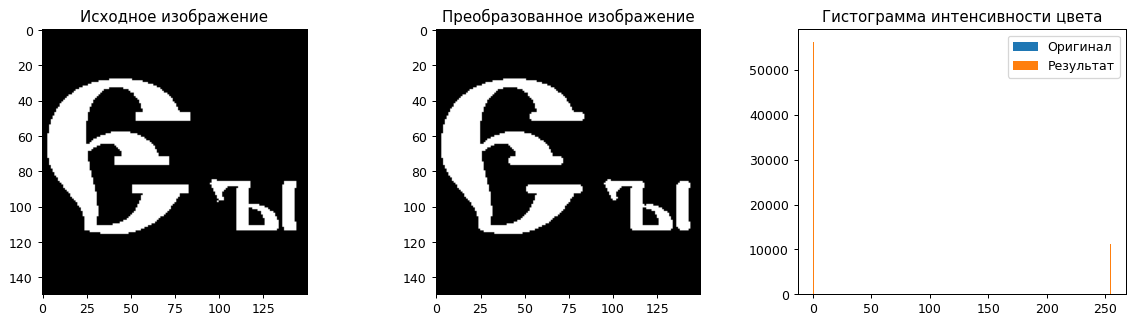

In [26]:
funk_el(img8,img5)

Структурный элемент "прямоугольник" убирает "лишние пиксели", тем самым "очистив" изображение и оставив четкую форму контуров. Так, например, разница у первого исходного изображения с преобразованным не наблюдается (неразлечима, в отличии от применения структурного элемента "эллипс"). Даже по гистограмме видно, что результаты практически неотличимы. Такой метод сглаживания даже больше повышает четкость объекта (например, внутренние круглые помехи на первом иображении стали четче)

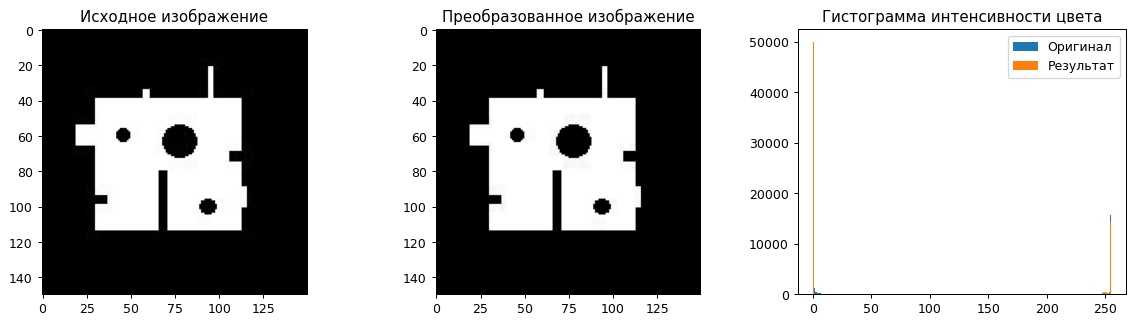

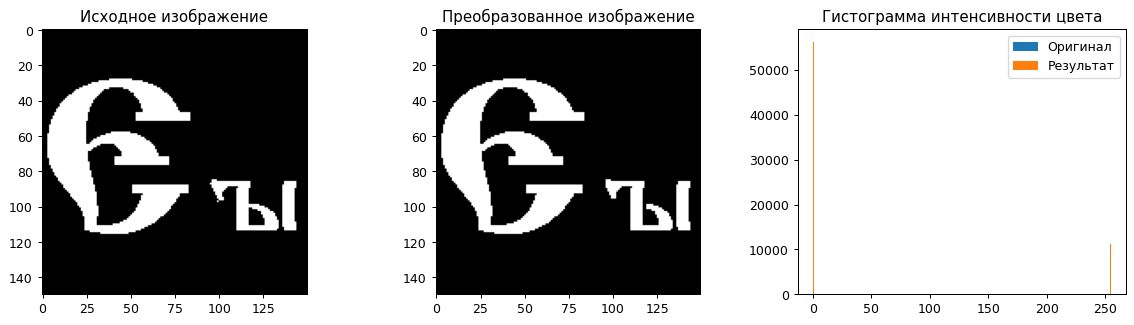

In [27]:
funk_rect(img8, img5)

###**6. С помощью порога бинаризуйте изображение morph3.bmp. Найдите контуры каждого элемента по отдельности (используйте для этого разное значение порога). Выделите несколько объектов на изображении, найдите их контуры. Опишите и сохраните результаты. Какие фильтры Вы выбирали?**

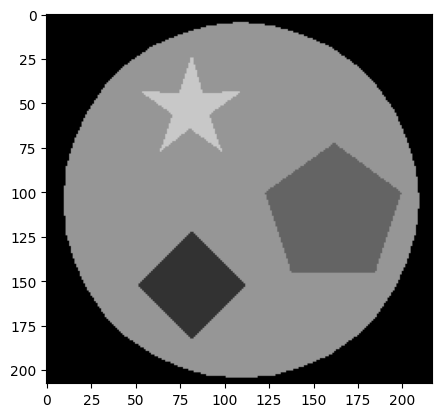

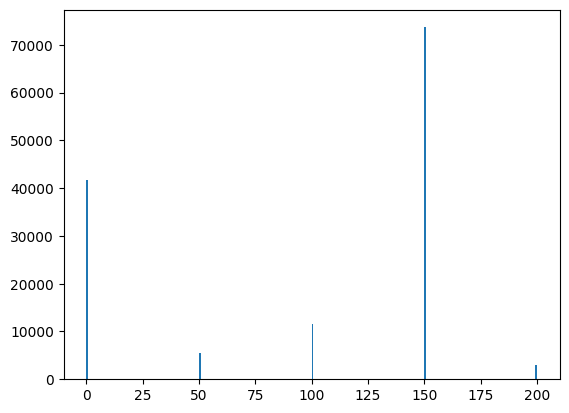

In [37]:
img6 = Image.open('morph3.bmp').convert('RGB')
plt.imshow(img6)
plt.show()
plt.hist(np.ravel(img6), bins=256)
plt.show()

In [38]:
def transform(f, img):
  img_copy = img.copy() # Преобразование копии
  draw = ImageDraw.Draw(img_copy) # Создание инструмента для рисования
  width = img_copy.size[0] # Ширина
  height = img_copy.size[1] # Высота
  pixels = img_copy.load() # Значение пикселей
  for i in range(width):
    for j in range(height):
      r, g, b = pixels[i, j]
      S = tuple(map(f, (r, g, b)))
      draw.point((i, j), S)

  return img_copy


In [39]:
# Интервальная бинаризация

def f1(x): # Ромб
  x1 = 25
  x2 = 75
  if x2 > x > x1:
    return 255
  return 0

def f2(x): # Правильный пятиугольник
  x1 = 75
  x2 = 125
  if x2 > x > x1:
    return 255
  return 0

def f3(x): # Звезда
  x1 = 175
  x2 = 255
  if x2 > x > x1:
    return 255
  return 0

In [40]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)) # потому что просто четче выделить контуры объекта

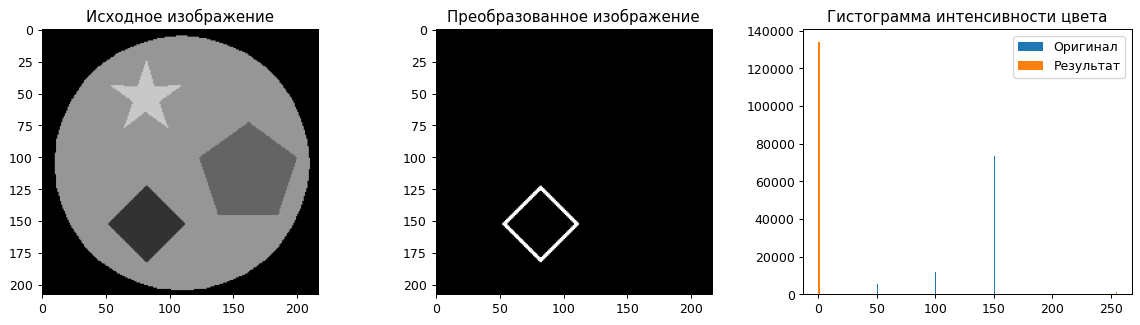

In [41]:
# Выделение контура ромба
rombus = cv2.cvtColor(np.array(transform(f1, img6)), cv2.COLOR_RGB2BGR)
rh_bound_img = rombus - cv2.erode(rombus, kernel, iterations = 1)

draw_img4(img6, rh_bound_img)
#Так, например, здесь контур ромба максимально четко выделен

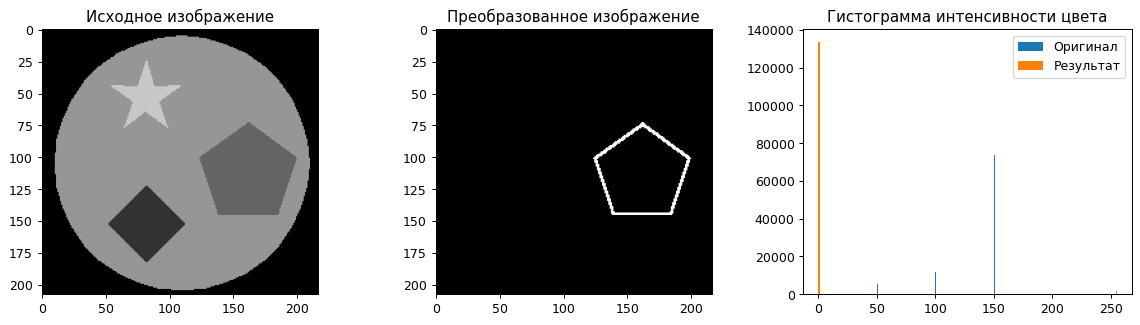

In [42]:
# Выделение контура правильного пятиугольника
figure5 = cv2.cvtColor(np.array(transform(f2, img6)), cv2.COLOR_RGB2BGR)
pg_bound_img = figure5 - cv2.erode(figure5, kernel, iterations = 1)

draw_img4(img6, pg_bound_img)

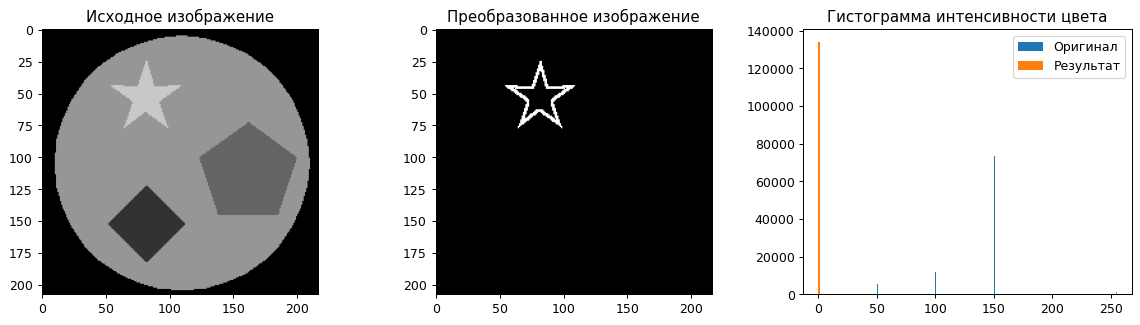

In [43]:
# Звезда
star = cv2.cvtColor(np.array(transform(f3, img6)), cv2.COLOR_RGB2BGR)
st_bound_img = star - cv2.erode(star, kernel, iterations = 1)

draw_img4(img6, st_bound_img)

In [44]:
def f_all(x):
  x1 = 140
  x2 = 170
  if x2 > x > x1:
    return 255
  return 0

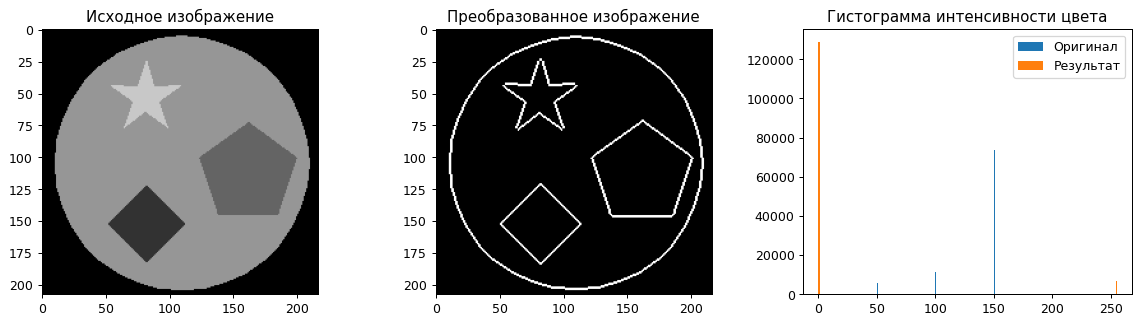

In [45]:
# Выделение контуров всех объектов
all = cv2.cvtColor(np.array(transform(f_all, img6)), cv2.COLOR_RGB2BGR)
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
all_bound_img = all - cv2.erode(all, kernel, iterations = 1)

draw_img4(img6, all_bound_img)

###**7. Откройте изображение Fingerprint.jpg. Разработайте и реализуйте последовательность морфологических операций для качественного выделения отпечатка пальца из изображения с одновременным подавлением шумов.**

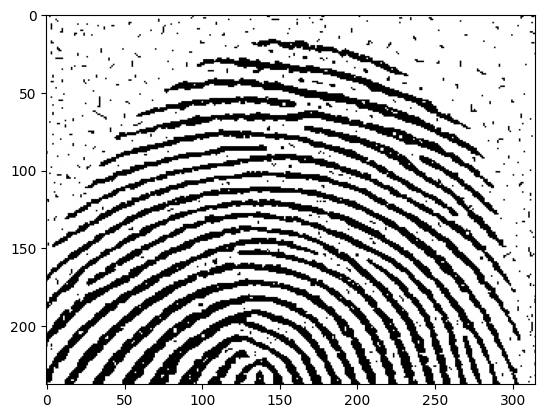

In [46]:
img4 = cv2.imread('Fingerprint.jpg')
plt.imshow(img4)
plt.show()

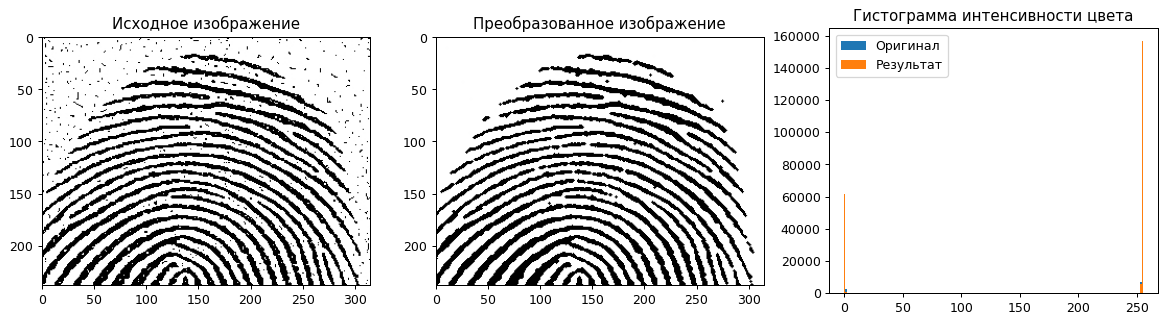

In [48]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)) # За счёт предыдущих тестов, эллипс хорошо сглаживает углы и подавляет шум

open_img = cv2.morphologyEx(img4, cv2.MORPH_OPEN, kernel,iterations=1)
close_img = cv2.morphologyEx(open_img, cv2.MORPH_CLOSE, kernel,iterations=1)

draw_img4(img4, close_img)